# TVB-NEST: Bridging multiscale activity by co-simulation

## Step-by-step learn how to perform a co-simulation embedding spiking neural networks into large-scale brain networks using TVB.

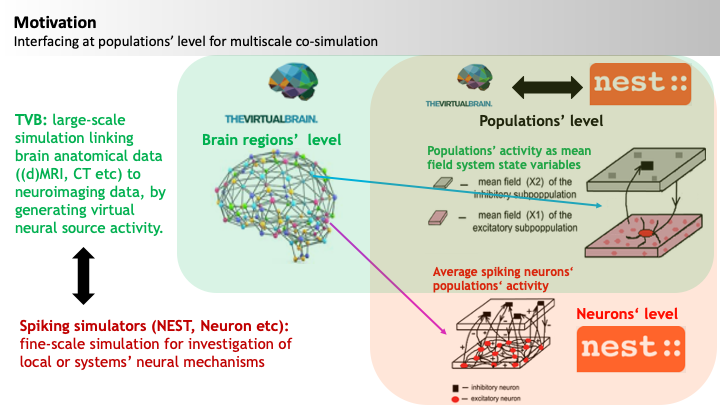

In [1]:
from IPython.core.display import Image, display
display(Image(filename='./ConceptGraph1.png',  width=1000, unconfined=False))

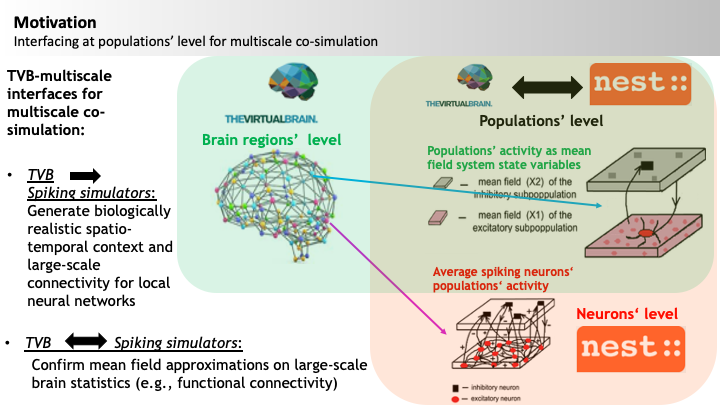

In [2]:
display(Image(filename='./ConceptGraph2.png',  width=1000, unconfined=False))

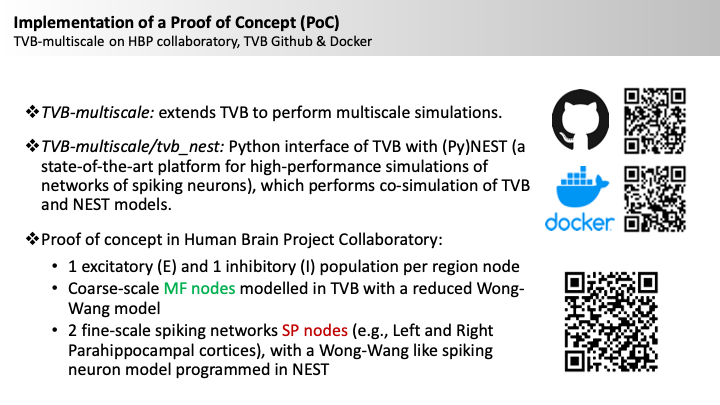

In [3]:
display(Image(filename='./Overview.png',  width=1000, unconfined=False))

## tvb-multiscale toolbox:

### https://github.com/the-virtual-brain/tvb-multiscale

For questions use the git issue tracker, or write an e-mail to me: dionysios.perdikis@charite.de

### TVB - NEST co-simulation with Reduced Wong-Wang model

We demonstrate a multiscale simulation <br> of a reduced Wong-Wang model [3] <br> using TVB [1, 2] for brain region modelled at coarse scale, <br> and NEST [4] for regions modelled as <br> networks of spiking neural populations.

## Reduced Wong-Wang mean field model

For every region node $n\prime$ modelled as a mean-field node in TVB:

(Post)Synaptic gating dynamics (i.e., proportion of synapse channels open at any given time):

$\dot{S_{n\prime}}^{(E)} = - \frac{1}{\tau_E}{S_{n\prime}}^{(E)}(t) + (1-{S_{n\prime}}^{(E)}(t))\gamma_{E} {r_{n\prime}}^{(E)}(t)$

$\dot{S_{n\prime}}^{(I)} = - \frac{1}{\tau_I}{S_{n\prime}}^{(I)}(t) + \gamma_I{r_{n\prime}}^{(I)}(t)$

where we bound ${S_{n\prime}}^{(E/I)}(t) \in $ [0.0, 1.0], 

and $ {r_{n\prime}}^{(E/I)}(t) $ is the postsynaptic firing rate given by:

$ {r_{n\prime}}^{(E/I)}(t) = H({I_{syn_{n\prime}}}^{(E/I)}(t), a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) $

where

$ H({I_{syn_{n\prime}}}^{(E/I)}(t),  a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) = \frac{a_{(E/I)}{I_{syn_{n\prime}}}^{(E/I)}(t)-b_{(E/I)}}{1-e^{-d_{(E/I)}(a_{(E/I)}{I_{syn_{n\prime}}}^{(E/I)}(t)-b_{(E/I)})}}$ 

is a sigmoidal activation function of the input presynaptic current.

The total input presynaptic current to excitatory populations is given by: 

$ {I_{syn_{n\prime}}}^{(E)}(t) = W_EI_o + w_+J_{NMDA}{S_{n\prime}}^{(E)}(t) - J_{{n\prime}}{S_{n\prime}}^{(I)}(t) + GJ_{NMDA}\sum_{{m\prime}\neq {n\prime}}C_{{m\prime}{n\prime}}S_{m\prime}^{(E)}(t-\tau_{{m\prime}{n\prime}})$

and to inhibitory ones:

$ {I_{syn_{n\prime}}}^{(I)}(t) = W_II_o + J_{NMDA}{S_{n\prime}}^{(E)}(t) - {S_{n\prime}}^{(I)}(t) +  \lambda GJ_{NMDA}\sum_{{m\prime}\neq {n\prime}}C_{{m\prime}{n\prime}}S_{m\prime}^{(E)}(t-\tau_{{m\prime}{n\prime}})$

where 
$\lambda  \in$[0, 1] for scaling feedforward inhibition.

TVB connectivity weights $C_{{m\prime}{n\prime}}$ are scaled per "region"

## Reduced Wong-Wang mean field model

## Parameters following Ponce-Alvarez et al 2014:

- structural TVB connectivity weights $C_{{m\prime}{n\prime}}$ (${m\prime}->{n\prime}$)
- structural TVB connectivity delays $\tau_{{m\prime}{n\prime}}$  (${m\prime}->{n\prime}$)
- global structural brain connectivity coupling constant $G$
- overall effective external input current $I_o = 0.382nA$ 
- excitatory synaptic coupling $J_{NDMA} = 0.15nA$ 
- local feedback inhibitory synaptic coupling $J_{i} = 1.0nA$ 
- local excitatory recurrence $w_+ = 1.4$
- excitatory kinetic parameter $\gamma_E = 0.641 s$
- inhibitory kinetic parameter $\gamma_I = 1.0 s$
- excitatory (NMDA) time constant $\tau_E = \tau_{NMDA}=100ms$ 
- inhibitory (GABA) time constant $\tau_I = \tau_{GABA}=10ms$ 
- excitatory pool scaling constant $W_E = 1.0$
- inhibitory pool scaling constant $W_I = 0.7$
- excitatory sigmoidal functions parameters $a_{E} = 310nC^{-1}$, $b_{E} = 125Hz$, $d_{E} = 0.16s$
- inhibitory sigmoidal functions parameters $a_{I} = 615nC^{-1}$, $b_{I} = 177Hz$, $d_{I} = 0.087s$
- $\lambda = 1$, allowing for feedforward inhibition


## Spiking network model in NEST

For every neuron $i$ in region node $n$ modelled in NEST as a spiking network:


$ C_m{\dot{V}_{ni}}^m = - {I_{ni}}^L(t) - {I_{ni}}^{AMPA}(t) - {I_{ni}}^{NMDA}(t) - {I_{ni} ^{GABA}}(t)- {I_{ni}}^{AMPA,ext}(t)-G\sum_{n\prime n}C_{n\prime \neq n}{I_{n\prime n,i}}^{dc}(t-\tau_{n\prime n}) +{I_{ni}}^{ext}(t) $

$\;\;\;\;\;\;\;\;\;\;=-g_m({V_{ni}}^m(t) - V_L) $
              
$\;\;\;\;\;\;\;\;\;\;\;-g_{AMPA}({V_{ni}}^m(t) - V_E)w_E{S_{ni}}^{AMPA}(t) $

$\;\;\;\;\;\;\;\;\;\;\;-\frac{g_{NMDA}({V_{ni}}^m(t) - V_E)}{1+\lambda_{NMDA}e^{-\beta{V_{ni}}^m(t)}}w_E{S_{ni}}^{NMDA}(t) $

$\;\;\;\;\;\;\;\;\;\;\;-g_{GABA}({V_{ni}}^m(t) - V_I)w_I{S_{ni}}^{GABA}(t) $

$\;\;\;\;\;\;\;\;\;\;\;-g_{AMPA,ext}({V_{ni}}^m(t) - V_E)G\sum_{n\prime \neq n}C_{n\prime \neq n}{S_{n\prime \neq ni}}^{AMPA,ext}(t) $

$\;\;\;\;\;\;\;\;\;\;\;+{I_{ni}}^{ext}(t) $

$ {\dot{S}_{ni}}^{AMPA/GABA} = -\frac{1}{\tau_{AMPA/GABA,decay}}{S_{ni}}^{AMPA/GABA}(t) + \left[ \sum_{j=1,j \neq i}^{N_{E/I}} \sum_k \delta(t-{t_j}^k) \right]_{j \in n}$

$ {\dot{X}_{ni}}^{NMDA} = -\frac{1}{\tau_{NMDA,rise}}{X_{ni}}^{NMDA}(t) + \left[ \sum_{j=1,j \neq i}^{N_E} \sum_k \delta(t-{t_j}^k) \right]_{j \in n} $

$ {\dot{S}_{ni}}^{NMDA} = -\frac{1}{\tau_{NMDA,decay}}{S_{ni}}^{NMDA}(t) + \alpha {X_{ni}}^{NMDA}(t) (1 - \epsilon{S_{ni}}^{NMDA}(t)) $

$ {\dot{S}_{n\prime \neq ni}}^{AMPA,ext} = -\frac{1}{\tau_{AMPA,decay}}{S_{n\prime \neq ni}}^{AMPA,ext}(t) + \left[ \sum_{j=1}^{N_E} \sum_k \delta(t-\tau_{n\prime n}-{t_j}^k) \right]_{j \in n\prime, n\prime \neq n} $

Boundaries assuming that self-connections of neurons are not possible:

For excitatory neurons:

$ {S_{n,exc}}^{AMPA/NMDA}(t) \in [0.0, N_E-1]$

$ {S_{n,exc}}^{GABA}(t) \in [0.0, N_I]$

For inhibitory neurons:

$ {S_{n,inh}}^{AMPA/NMDA}(t) \in [0.0, N_E]$

$ {S_{n,inh}}^{GABA}(t) \in [0.0, N_I-1]$

For all neurons:

$ {S_{n,exc/inh}}^{AMPA,ext}(t) \in [0.0, N_E]$

When $V_m(t) > V_{th}$, emit a spike and clamp $V_m(t)$ to $V_{reset}$ for $\tau_{ref}$ ms.

For TVB to NEST coupling:

The term 

$ G\sum_{n\prime n}C_{n\prime \neq n}{I_{n\prime n,i}}^{dc}(t-\tau_{n\prime n})$,

which is scaled by $\lambda$ for inhibitory neurons,

denotes possible inputs by NEST dc current generator devices that can play the role of TVB "proxy" nodes, i.e., mirroring their activity, where

$ I_{n\prime n,i}^{dc}(t) = N_EJ_{NMDA}{S_{n\prime}}^{(E)}(t) $

Similarly, $I_{ni}^{ext}(t)$ is an external current parameter that can be updated at each time step based on the TVB large-scale delayed coupling input towards region node n:

for excitatory neurons:

$I_{n,exc}^{ext}(t) = N_EGJ_{NMDA}\sum_{{n\prime} n}C_{{n\prime}}S_{n\prime}^{(E)}(t-\tau_{{n\prime}n})$

and for inhibitory ones:

$I_{n,inh}^{ext}(t) = N_E\lambda GJ_{NMDA}\sum_{{n\prime}n}C_{{n\prime}n}S_{n\prime}^{(E)}(t-\tau_{{n\prime}n})$

Instead, when TVB couples to NEST via instantaneous spike rate $ N_E{r_{n\prime}}^{(E/I)}(t) $, spike generator NEST devices are also used as TVB "proxy" nodes and generate spike trains 

$ \left[ \sum_k \delta(t-\tau_{n\prime n}-{t_j}^k) \right]_{j \in n\prime} $

Notice that all large-scale input is always scaled with the size of the excitatory population $ N_E $.


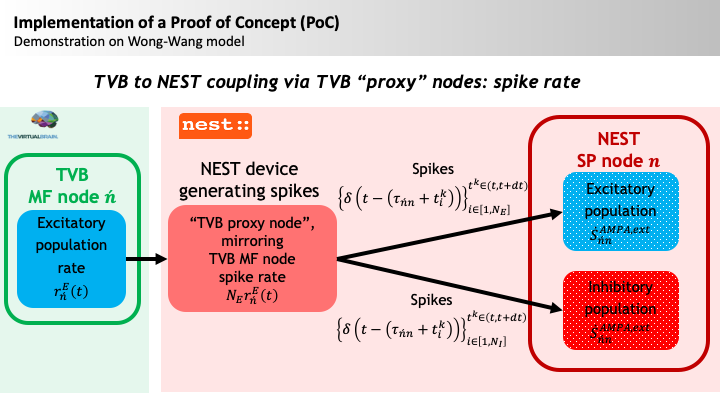

In [4]:
display(Image(filename='./Rate.png',  width=1000, unconfined=False))

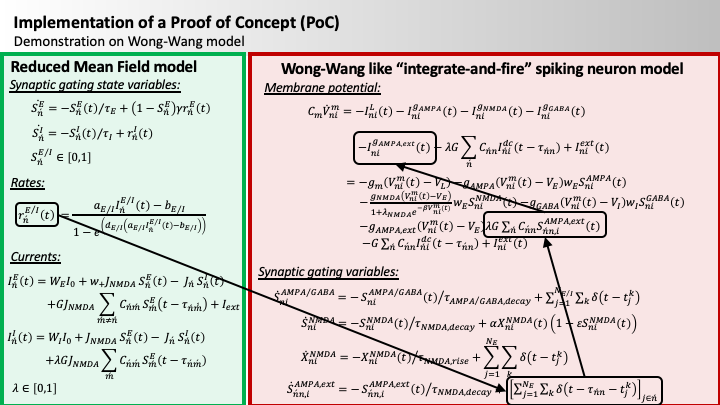

In [5]:
display(Image(filename='./Rate2.png',  width=1000, unconfined=False))

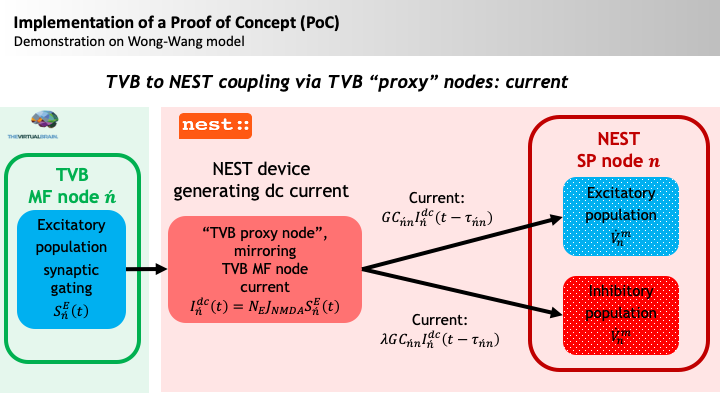

In [6]:
display(Image(filename='./DC.png',  width=1000, unconfined=False))

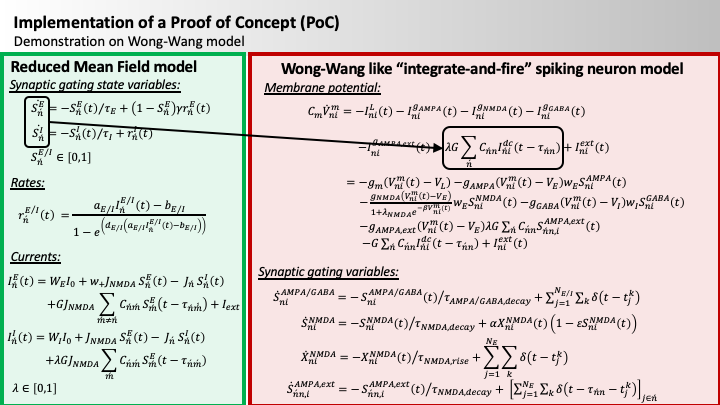

In [7]:
display(Image(filename='./DC2.png',  width=1000, unconfined=False))

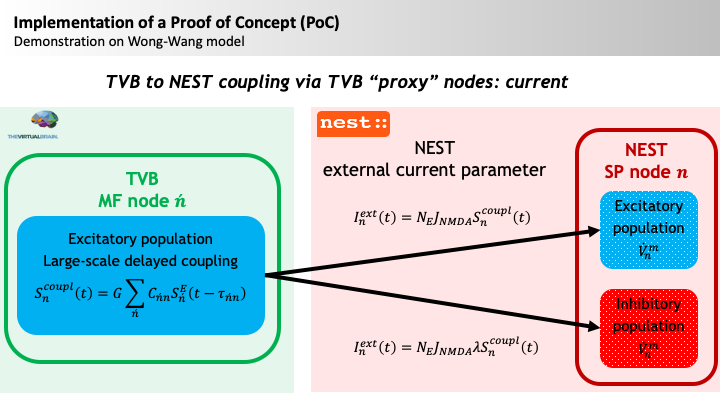

In [8]:
display(Image(filename='./Ie.png',  width=1000, unconfined=False))

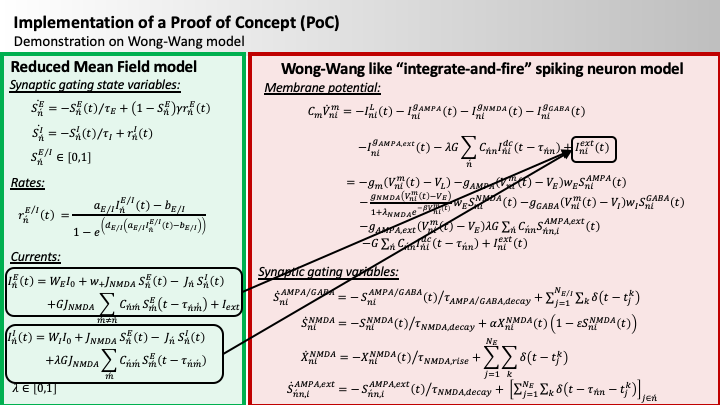

In [9]:
display(Image(filename='./Ie2.png',  width=1000, unconfined=False))

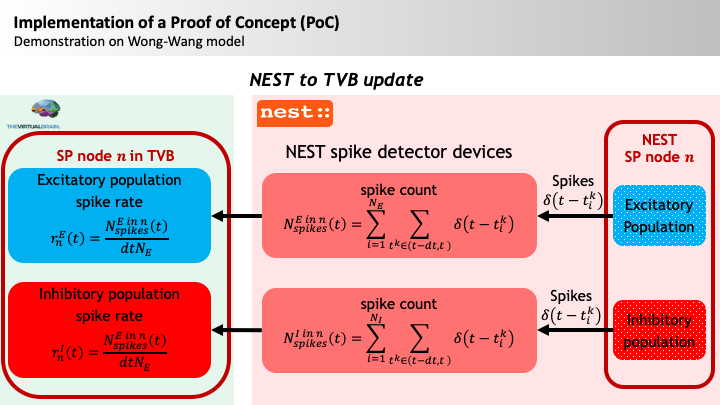

In [10]:
display(Image(filename='./NESTtoTVB.png',  width=1000, unconfined=False))

## Simulator loop

### Simulating several (i.e., 10) NEST time steps for every 1 TVB time step for stable integration

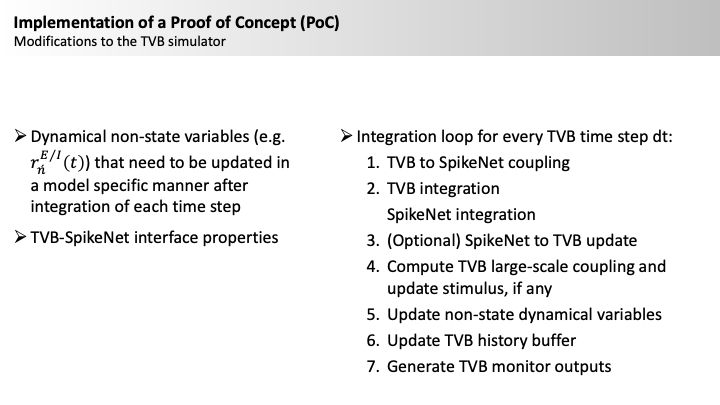

In [11]:
display(Image(filename='./simulator_loop.png',  width=1000, unconfined=False))

In [12]:
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_nest.config import *
config = Config()
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'

from tvb_multiscale.plot.plotter import Plotter
plotter = Plotter(config)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2020-04-01 18:42:36,318 - INFO - numexpr.utils - NumExpr defaulting to 6 threads.


/home/docker/packages/tvb-root/scientific_library/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


2020-04-01 18:42:37,303 - DEBUG - matplotlib - $HOME=/home/docker
2020-04-01 18:42:37,303 - DEBUG - matplotlib - CONFIGDIR=/home/docker/.config/matplotlib
2020-04-01 18:42:37,306 - DEBUG - matplotlib - matplotlib data path: /usr/share/matplotlib/mpl-data
2020-04-01 18:42:37,307 - DEBUG - matplotlib - loaded rc file /etc/matplotlibrc
2020-04-01 18:42:37,310 - DEBUG - matplotlib - matplotlib version 3.0.2
2020-04-01 18:42:37,311 - DEBUG - matplotlib - interactive is False
2020-04-01 18:42:37,312 - DEBUG - matplotlib - platform is linux
2020-04-01 18:42:37,313 - DEBUG - matplotlib - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_colle

2020-04-01 18:42:37,353 - DEBUG - matplotlib - CACHEDIR=/home/docker/.cache/matplotlib
2020-04-01 18:42:37,355 - DEBUG - matplotlib.font_manager - Using fontManager instance from /home/docker/.cache/matplotlib/fontlist-v300.json
2020-04-01 18:42:37,481 - DEBUG - matplotlib.pyplot - Loaded backend agg version unknown.
2020-04-01 18:42:37,667 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.projections.ProjectionMatrix.conductances = Attr(field_type=<class 'dict'>, default={'air': 0.0, 'skin': 1.0, 'skull': 0.01, 'brain': 1.0}, required=False)
2020-04-01 18:42:37,703 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.datatypes.time_series.TimeSeries.labels_dimensions = Attr(field_type=<class 'dict'>, default={}, required=True)
2020-04-01 18:42:38,236 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab

## 1. Load structural data <br> (minimally a TVB connectivity)

2020-04-01 18:42:38,299 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5498754d68>
2020-04-01 18:42:38,301 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2020-04-01 18:42:38,302 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5498754d68>
2020-04-01 18:42:38,303 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2020-04-01 18:42:38,411 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:42:38,412 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2020-04-01 18:42:38,467 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans ('/usr/share/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
2020-04-01 18:42:38,639 - DEBUG - matplotlib.font_manager - findfont: Matching :family=sans

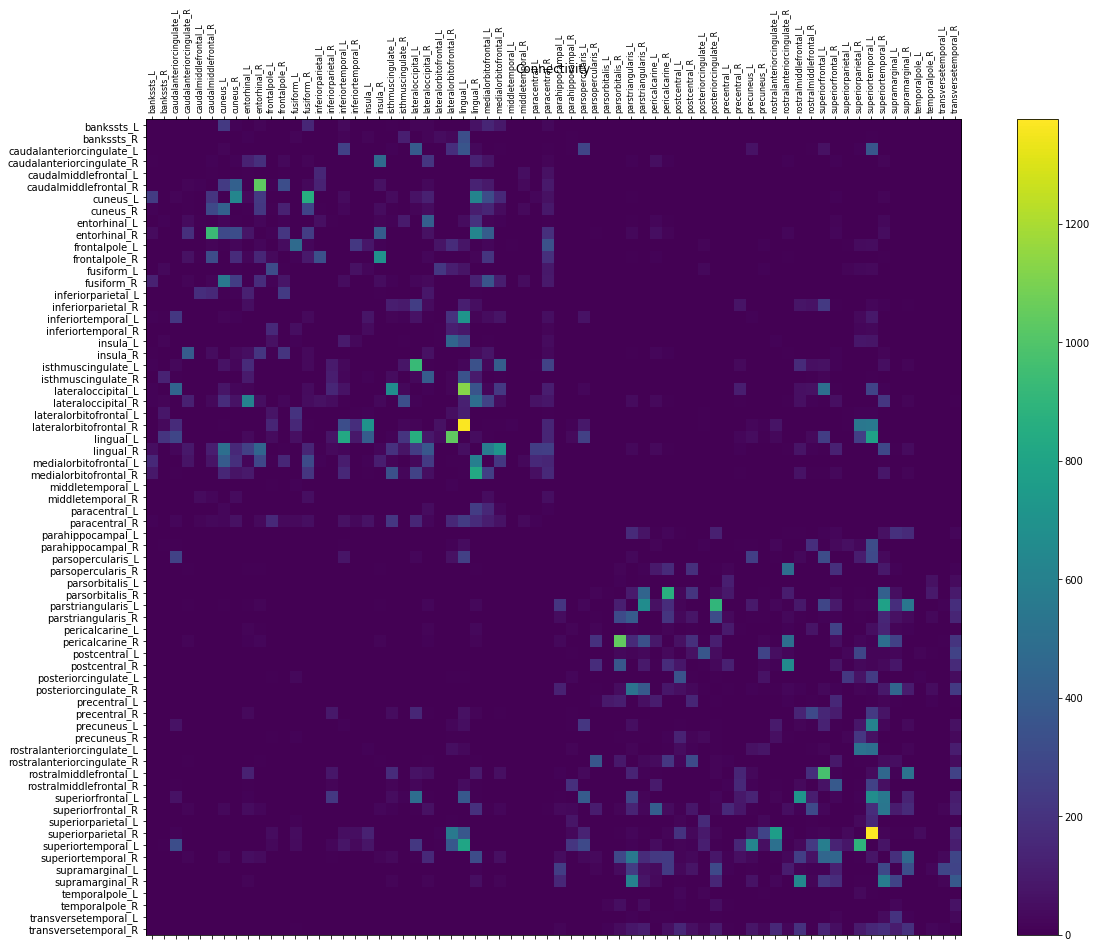

2020-04-01 18:42:40,837 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5498625d30>
2020-04-01 18:42:40,837 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2020-04-01 18:42:40,839 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f5498625d30>
2020-04-01 18:42:40,840 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2020-04-01 18:42:40,954 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:42:40,955 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2020-04-01 18:42:41,280 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:42:41,400 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:42:41,401 - DEBUG - matplotlib.axes._base - title position was updated manually, not adjusting
2020-04-01 18:42:41,699 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:42:41,

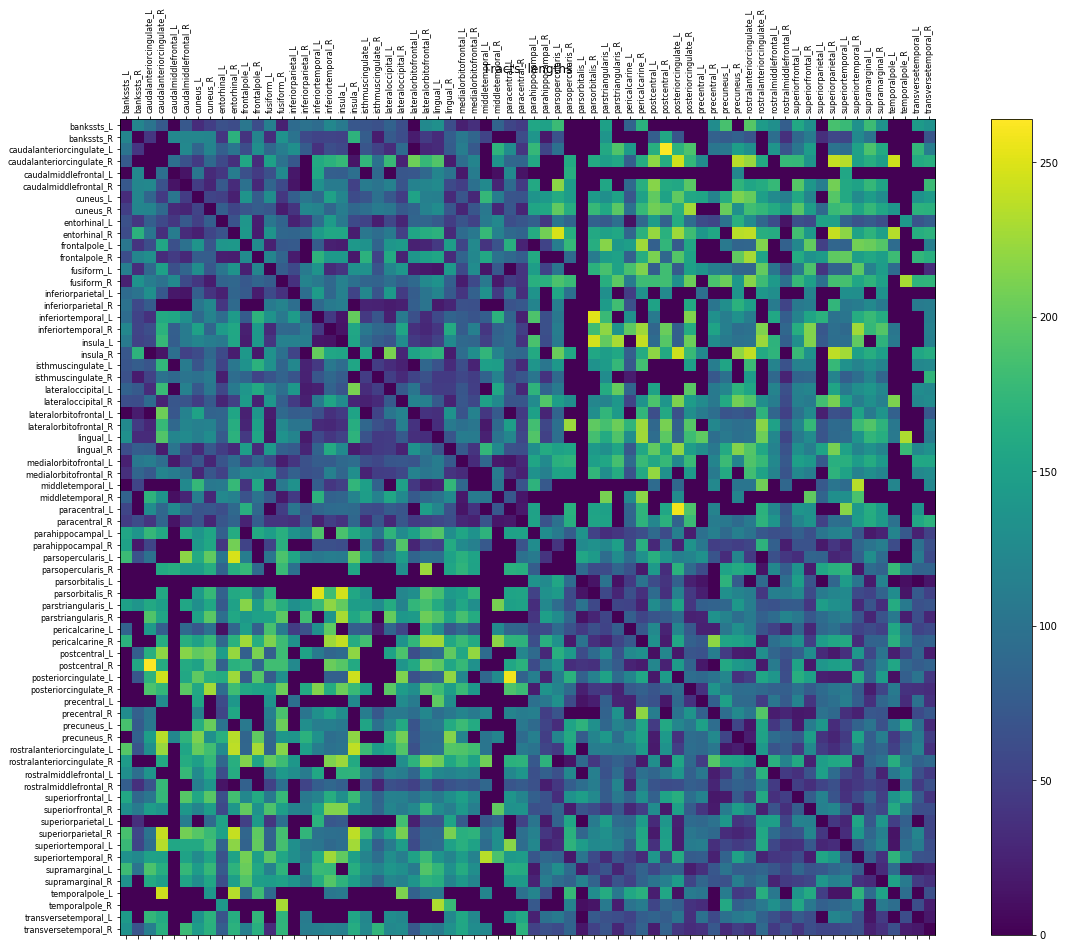

(<Figure size 1440x1080 with 2 Axes>,
 <Figure size 1440x1080 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f54937cf390>)

In [13]:
from tvb.datatypes.connectivity import Connectivity
connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
connectivity.configure()
plotter.plot_tvb_connectivity(connectivity)

## 2. Prepare TVB simulator <br> (region mean field model, integrator, monitors etc)

In [14]:
from tvb.simulator.simulator import Simulator
from tvb.simulator.models.reduced_wong_wang_exc_io_inh_i import ReducedWongWangExcIOInhI
from tvb.simulator.integrators import HeunStochastic
from tvb.simulator.monitors import Raw  # , Bold, EEG

# Create a TVB simulator and set all desired inputs
# (connectivity, model, surface, stimuli etc)
# We choose all defaults in this example
simulator = Simulator()
simulator.model = ReducedWongWangExcIOInhI()
# Feedback inhibition, local inhibitory -> excitatory coupling:
simulator.model.J_i = np.array([1.0, ]) 
# Feedforward inhibition, large scale excitatory -> inhibitory coupling:
simulator.model.lamda = np.array([0.0, ]) 

simulator.connectivity = connectivity

simulator.integrator = HeunStochastic()
simulator.integrator.dt = 0.1
#                                            S_e,   S_i,  R_e, R_i
simulator.integrator.noise.nsig = np.array([0.001, 0.001, 0.0, 0.0])

mon_raw = Raw(period=1.0)  # simulator.integrator.dt
# Some extra monitors for neuroimaging measures:
# mon_bold = Bold(period=2000.)
# mon_eeg = EEG(period=simulator.integrator.dt)
simulator.monitors = (mon_raw, )  # mon_bold, mon_eeg

2020-04-01 18:42:43,298 - WARNING - tvb.simulator.common - psutil module not available: no warnings will be issued when a
    simulation may require more memory than available
2020-04-01 18:42:43,336 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.coupling.HyperbolicTangent.b = NArray(label=':math:`b`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2020-04-01 18:42:43,343 - WARNING - tvb.traits - default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.coupling.Kuramoto.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
2020-04-01 18:42:43,630 - DEBUG - numba.byteflow - bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=17, lineno=47)
           4	LOAD_CONST(arg=1, lineno=47)
           6	BINARY_SUBSCR(arg=None, lineno=47)
           8	LOAD_FAST(arg=9, lineno=47)
          10	LOA

2020-04-01 18:42:43,637 - DEBUG - numba.byteflow - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=47)
2020-04-01 18:42:43,639 - DEBUG - numba.byteflow - stack ['$g2.0']
2020-04-01 18:42:43,640 - DEBUG - numba.byteflow - dispatch pc=6, inst=BINARY_SUBSCR(arg=None, lineno=47)
2020-04-01 18:42:43,641 - DEBUG - numba.byteflow - stack ['$g2.0', '$const4.1']
2020-04-01 18:42:43,643 - DEBUG - numba.byteflow - dispatch pc=8, inst=LOAD_FAST(arg=9, lineno=47)
2020-04-01 18:42:43,644 - DEBUG - numba.byteflow - stack ['$6binary_subscr.2']
2020-04-01 18:42:43,645 - DEBUG - numba.byteflow - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=47)
2020-04-01 18:42:43,647 - DEBUG - numba.byteflow - stack ['$6binary_subscr.2', '$jn8.3']
2020-04-01 18:42:43,648 - DEBUG - numba.byteflow - dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=47)
2020-04-01 18:42:43,649 - DEBUG - numba.byteflow - stack ['$6binary_subscr.2', '$jn8.3', '$const10.4']
2020-04-01 18:42:43,650 - DEBUG - numba.byteflow - dispatch pc=14, in

2020-04-01 18:42:43,741 - DEBUG - numba.byteflow - stack ['$82binary_add.38', '$cc84.39']
2020-04-01 18:42:43,742 - DEBUG - numba.byteflow - dispatch pc=88, inst=STORE_FAST(arg=23, lineno=51)
2020-04-01 18:42:43,743 - DEBUG - numba.byteflow - stack ['$86binary_add.40']
2020-04-01 18:42:43,744 - DEBUG - numba.byteflow - dispatch pc=90, inst=LOAD_FAST(arg=2, lineno=52)
2020-04-01 18:42:43,745 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:43,746 - DEBUG - numba.byteflow - dispatch pc=92, inst=LOAD_CONST(arg=1, lineno=52)
2020-04-01 18:42:43,747 - DEBUG - numba.byteflow - stack ['$ae90.41']
2020-04-01 18:42:43,748 - DEBUG - numba.byteflow - dispatch pc=94, inst=BINARY_SUBSCR(arg=None, lineno=52)
2020-04-01 18:42:43,749 - DEBUG - numba.byteflow - stack ['$ae90.41', '$const92.42']
2020-04-01 18:42:43,750 - DEBUG - numba.byteflow - dispatch pc=96, inst=LOAD_FAST(arg=23, lineno=52)
2020-04-01 18:42:43,750 - DEBUG - numba.byteflow - stack ['$94binary_subscr.43']
2020-04-01 18:42:43,751 -

2020-04-01 18:42:43,830 - DEBUG - numba.byteflow - dispatch pc=168, inst=LOAD_FAST(arg=5, lineno=54)
2020-04-01 18:42:43,831 - DEBUG - numba.byteflow - stack ['$152unary_negative.70', '$166binary_multiply.77']
2020-04-01 18:42:43,832 - DEBUG - numba.byteflow - dispatch pc=170, inst=LOAD_CONST(arg=1, lineno=54)
2020-04-01 18:42:43,833 - DEBUG - numba.byteflow - stack ['$152unary_negative.70', '$166binary_multiply.77', '$ge168.78']
2020-04-01 18:42:43,834 - DEBUG - numba.byteflow - dispatch pc=172, inst=BINARY_SUBSCR(arg=None, lineno=54)
2020-04-01 18:42:43,835 - DEBUG - numba.byteflow - stack ['$152unary_negative.70', '$166binary_multiply.77', '$ge168.78', '$const170.79']
2020-04-01 18:42:43,836 - DEBUG - numba.byteflow - dispatch pc=174, inst=BINARY_MULTIPLY(arg=None, lineno=54)
2020-04-01 18:42:43,837 - DEBUG - numba.byteflow - stack ['$152unary_negative.70', '$166binary_multiply.77', '$172binary_subscr.80']
2020-04-01 18:42:43,838 - DEBUG - numba.byteflow - dispatch pc=176, inst=BINA

2020-04-01 18:42:43,907 - DEBUG - numba.byteflow - stack ['$x244.113', '$const246.114']
2020-04-01 18:42:43,908 - DEBUG - numba.byteflow - dispatch pc=250, inst=LOAD_METHOD(arg=1, lineno=58)
2020-04-01 18:42:43,909 - DEBUG - numba.byteflow - stack ['$x244.113', '$const246.114', '$248load_global.115']
2020-04-01 18:42:43,910 - DEBUG - numba.byteflow - dispatch pc=252, inst=LOAD_FAST(arg=12, lineno=58)
2020-04-01 18:42:43,910 - DEBUG - numba.byteflow - stack ['$x244.113', '$const246.114', '$250load_method.116']
2020-04-01 18:42:43,911 - DEBUG - numba.byteflow - dispatch pc=254, inst=LOAD_CONST(arg=1, lineno=58)
2020-04-01 18:42:43,912 - DEBUG - numba.byteflow - stack ['$x244.113', '$const246.114', '$250load_method.116', '$di252.117']
2020-04-01 18:42:43,913 - DEBUG - numba.byteflow - dispatch pc=256, inst=BINARY_SUBSCR(arg=None, lineno=58)
2020-04-01 18:42:43,914 - DEBUG - numba.byteflow - stack ['$x244.113', '$const246.114', '$250load_method.116', '$di252.117', '$const254.118']
2020-04-

2020-04-01 18:42:43,993 - DEBUG - numba.interpreter - label 0:
    S = arg(0, name=S)                       ['S']
    c = arg(1, name=c)                       ['c']
    ae = arg(2, name=ae)                     ['ae']
    be = arg(3, name=be)                     ['be']
    de = arg(4, name=de)                     ['de']
    ge = arg(5, name=ge)                     ['ge']
    te = arg(6, name=te)                     ['te']
    wp = arg(7, name=wp)                     ['wp']
    we = arg(8, name=we)                     ['we']
    jn = arg(9, name=jn)                     ['jn']
    ai = arg(10, name=ai)                    ['ai']
    bi = arg(11, name=bi)                    ['bi']
    di = arg(12, name=di)                    ['di']
    gi = arg(13, name=gi)                    ['gi']
    ti = arg(14, name=ti)                    ['ti']
    wi = arg(15, name=wi)                    ['wi']
    ji = arg(16, name=ji)                    ['ji']
    g = arg(17, name=g)                      ['g']
    

2020-04-01 18:42:44,394 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wong_wang_exc_inh.ReducedWongWangExcInh.state_variable_range = Final(field_type=<class 'dict'>, default={'S_e': array([0., 1.]), 'S_i': array([0., 1.])}, required=True)
2020-04-01 18:42:44,395 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wong_wang_exc_inh.ReducedWongWangExcInh.state_variable_boundaries = Final(field_type=<class 'dict'>, default={'S_e': array([0., 1.]), 'S_i': array([0., 1.])}, required=True)
2020-04-01 18:42:44,404 - DEBUG - numba.byteflow - bytecode dump:
>          0	NOP(arg=None, lineno=44)
           2	LOAD_FAST(arg=15, lineno=44)
           4	LOAD_CONST(arg=1, lineno=44)
           6	BINARY_SUBSCR(arg=None, lineno=44)
           8	LOAD_FAST(arg=7, lineno=44)
          10	LOAD_CONST(arg=1, linen

2020-04-01 18:42:44,409 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:44,410 - DEBUG - numba.byteflow - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=44)
2020-04-01 18:42:44,411 - DEBUG - numba.byteflow - stack ['$g2.0']
2020-04-01 18:42:44,411 - DEBUG - numba.byteflow - dispatch pc=6, inst=BINARY_SUBSCR(arg=None, lineno=44)
2020-04-01 18:42:44,412 - DEBUG - numba.byteflow - stack ['$g2.0', '$const4.1']
2020-04-01 18:42:44,413 - DEBUG - numba.byteflow - dispatch pc=8, inst=LOAD_FAST(arg=7, lineno=44)
2020-04-01 18:42:44,414 - DEBUG - numba.byteflow - stack ['$6binary_subscr.2']
2020-04-01 18:42:44,415 - DEBUG - numba.byteflow - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=44)
2020-04-01 18:42:44,416 - DEBUG - numba.byteflow - stack ['$6binary_subscr.2', '$jn8.3']
2020-04-01 18:42:44,417 - DEBUG - numba.byteflow - dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=44)
2020-04-01 18:42:44,418 - DEBUG - numba.byteflow - stack ['$6binary_subscr.2', '$jn8.3', '$const10.4']
2020-04-0

2020-04-01 18:42:44,501 - DEBUG - numba.byteflow - stack ['$78binary_subtract.12', '$we80.13', '$const82.14']
2020-04-01 18:42:44,502 - DEBUG - numba.byteflow - dispatch pc=86, inst=LOAD_FAST(arg=17, lineno=49)
2020-04-01 18:42:44,503 - DEBUG - numba.byteflow - stack ['$78binary_subtract.12', '$84binary_subscr.15']
2020-04-01 18:42:44,504 - DEBUG - numba.byteflow - dispatch pc=88, inst=LOAD_CONST(arg=1, lineno=49)
2020-04-01 18:42:44,506 - DEBUG - numba.byteflow - stack ['$78binary_subtract.12', '$84binary_subscr.15', '$io86.16']
2020-04-01 18:42:44,507 - DEBUG - numba.byteflow - dispatch pc=90, inst=BINARY_SUBSCR(arg=None, lineno=49)
2020-04-01 18:42:44,508 - DEBUG - numba.byteflow - stack ['$78binary_subtract.12', '$84binary_subscr.15', '$io86.16', '$const88.17']
2020-04-01 18:42:44,508 - DEBUG - numba.byteflow - dispatch pc=92, inst=BINARY_MULTIPLY(arg=None, lineno=49)
2020-04-01 18:42:44,509 - DEBUG - numba.byteflow - stack ['$78binary_subtract.12', '$84binary_subscr.15', '$90binar

2020-04-01 18:42:44,605 - DEBUG - numba.byteflow - stack ['$ri158.0', '$const160.1']
2020-04-01 18:42:44,606 - DEBUG - numba.byteflow - dispatch pc=164, inst=LOAD_CONST(arg=2, lineno=54)
2020-04-01 18:42:44,606 - DEBUG - numba.byteflow - stack ['$162binary_subscr.2']
2020-04-01 18:42:44,607 - DEBUG - numba.byteflow - dispatch pc=166, inst=COMPARE_OP(arg=0, lineno=54)
2020-04-01 18:42:44,608 - DEBUG - numba.byteflow - stack ['$162binary_subscr.2', '$const164.3']
2020-04-01 18:42:44,609 - DEBUG - numba.byteflow - dispatch pc=168, inst=POP_JUMP_IF_FALSE(arg=268, lineno=54)
2020-04-01 18:42:44,610 - DEBUG - numba.byteflow - stack ['$166compare_op.4']
2020-04-01 18:42:44,612 - DEBUG - numba.byteflow - end state. edges=[Edge(pc=172, stack=(), blockstack=(), npush=0), Edge(pc=268, stack=(), blockstack=(), npush=0)]
2020-04-01 18:42:44,613 - DEBUG - numba.byteflow - pending: deque([State(pc_initial=158 nstack_initial=0), State(pc_initial=172 nstack_initial=0), State(pc_initial=268 nstack_initi

2020-04-01 18:42:44,707 - DEBUG - numba.byteflow - stack ['$x232.28', '$const234.29', '$238load_method.31', '$di240.32']
2020-04-01 18:42:44,709 - DEBUG - numba.byteflow - dispatch pc=244, inst=BINARY_SUBSCR(arg=None, lineno=57)
2020-04-01 18:42:44,710 - DEBUG - numba.byteflow - stack ['$x232.28', '$const234.29', '$238load_method.31', '$di240.32', '$const242.33']
2020-04-01 18:42:44,711 - DEBUG - numba.byteflow - dispatch pc=246, inst=UNARY_NEGATIVE(arg=None, lineno=57)
2020-04-01 18:42:44,720 - DEBUG - numba.byteflow - stack ['$x232.28', '$const234.29', '$238load_method.31', '$244binary_subscr.34']
2020-04-01 18:42:44,721 - DEBUG - numba.byteflow - dispatch pc=248, inst=LOAD_FAST(arg=21, lineno=57)
2020-04-01 18:42:44,722 - DEBUG - numba.byteflow - stack ['$x232.28', '$const234.29', '$238load_method.31', '$246unary_negative.35']
2020-04-01 18:42:44,723 - DEBUG - numba.byteflow - dispatch pc=250, inst=BINARY_MULTIPLY(arg=None, lineno=57)
2020-04-01 18:42:44,724 - DEBUG - numba.byteflow

2020-04-01 18:42:44,807 - DEBUG - numba.byteflow - defmap: {}
2020-04-01 18:42:44,808 - DEBUG - numba.byteflow - phismap: defaultdict(<class 'set'>, {})
2020-04-01 18:42:44,809 - DEBUG - numba.byteflow - changing phismap: defaultdict(<class 'set'>, {})
2020-04-01 18:42:44,809 - DEBUG - numba.byteflow - keep phismap: {}
2020-04-01 18:42:44,810 - DEBUG - numba.byteflow - new_out: defaultdict(<class 'dict'>, {})
2020-04-01 18:42:44,811 - DEBUG - numba.byteflow - ----------------------DONE Prune PHIs-----------------------
2020-04-01 18:42:44,812 - DEBUG - numba.byteflow - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$g2.0'}), (4, {'res': '$const4.1'}), (6, {'index': '$const4.1', 'target': '$g2.0', 'res': '$6binary_subscr.2'}), (8, {'res': '$jn8.3'}), (10, {'res': '$const10.4'}), (12, {'index': '$const10.4', 'target': '$jn8.3', 'res': '$12binary_subscr.5'}), (14, {'lhs': '$6binary_subscr.2', 'rhs': '$12binary_subscr.5', 'res': '$14binary_mul

2020-04-01 18:42:44,816 - DEBUG - numba.byteflow - block_infos State(pc_initial=268 nstack_initial=0):
AdaptBlockInfo(insts=((268, {'res': '$S268.0'}), (270, {'res': '$const270.1'}), (272, {'index': '$const270.1', 'target': '$S268.0', 'res': '$272binary_subscr.2'}), (274, {'res': '$newS274.3'}), (276, {'res': '$const276.4'}), (278, {'target': '$newS274.3', 'index': '$const276.4', 'value': '$272binary_subscr.2'}), (280, {'res': '$S280.5'}), (282, {'res': '$const282.6'}), (284, {'index': '$const282.6', 'target': '$S280.5', 'res': '$284binary_subscr.7'}), (286, {'res': '$newS286.8'}), (288, {'res': '$const288.9'}), (290, {'target': '$newS286.8', 'index': '$const288.9', 'value': '$284binary_subscr.7'}), (292, {'res': '$S292.10'}), (294, {'res': '$const294.11'}), (296, {'index': '$const294.11', 'target': '$S292.10', 'res': '$296binary_subscr.12'}), (298, {'res': '$newS298.13'}), (300, {'res': '$const300.14'}), (302, {'target': '$newS298.13', 'index': '$const300.14', 'value': '$296binary_sub

2020-04-01 18:42:45,131 - DEBUG - numba.byteflow - bytecode dump:
>          0	NOP(arg=None, lineno=70)
           2	LOAD_FAST(arg=0, lineno=70)
           4	LOAD_CONST(arg=1, lineno=70)
           6	BINARY_SUBSCR(arg=None, lineno=70)
           8	LOAD_FAST(arg=2, lineno=70)
          10	LOAD_CONST(arg=1, lineno=70)
          12	BINARY_SUBSCR(arg=None, lineno=70)
          14	BINARY_TRUE_DIVIDE(arg=None, lineno=70)
          16	UNARY_NEGATIVE(arg=None, lineno=70)
          18	LOAD_CONST(arg=2, lineno=70)
          20	LOAD_FAST(arg=0, lineno=70)
          22	LOAD_CONST(arg=1, lineno=70)
          24	BINARY_SUBSCR(arg=None, lineno=70)
          26	BINARY_SUBTRACT(arg=None, lineno=70)
          28	LOAD_FAST(arg=0, lineno=70)
          30	LOAD_CONST(arg=3, lineno=70)
          32	BINARY_SUBSCR(arg=None, lineno=70)
          34	BINARY_MULTIPLY(arg=None, lineno=70)
          36	LOAD_FAST(arg=1, lineno=70)
          38	LOAD_CONST(arg=1, lineno=70)
          40	BINARY_SUBSCR(arg=None, lineno=7

2020-04-01 18:42:45,202 - DEBUG - numba.byteflow - stack ['$const52.24']
2020-04-01 18:42:45,203 - DEBUG - numba.byteflow - dispatch pc=56, inst=LOAD_CONST(arg=3, lineno=71)
2020-04-01 18:42:45,205 - DEBUG - numba.byteflow - stack ['$const52.24', '$dx54.25']
2020-04-01 18:42:45,207 - DEBUG - numba.byteflow - dispatch pc=58, inst=STORE_SUBSCR(arg=None, lineno=71)
2020-04-01 18:42:45,207 - DEBUG - numba.byteflow - stack ['$const52.24', '$dx54.25', '$const56.26']
2020-04-01 18:42:45,208 - DEBUG - numba.byteflow - dispatch pc=60, inst=LOAD_FAST(arg=0, lineno=73)
2020-04-01 18:42:45,210 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:45,211 - DEBUG - numba.byteflow - dispatch pc=62, inst=LOAD_CONST(arg=5, lineno=73)
2020-04-01 18:42:45,212 - DEBUG - numba.byteflow - stack ['$S60.27']
2020-04-01 18:42:45,213 - DEBUG - numba.byteflow - dispatch pc=64, inst=BINARY_SUBSCR(arg=None, lineno=73)
2020-04-01 18:42:45,214 - DEBUG - numba.byteflow - stack ['$S60.27', '$const62.28']
2020-04-01 18:

2020-04-01 18:42:45,289 - DEBUG - numba.interpreter - label 0:
    S = arg(0, name=S)                       ['S']
    ge = arg(1, name=ge)                     ['ge']
    te = arg(2, name=te)                     ['te']
    gi = arg(3, name=gi)                     ['gi']
    ti = arg(4, name=ti)                     ['ti']
    dx = arg(5, name=dx)                     ['dx']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=S, index=$const4.1) ['$6binary_subscr.2', '$const4.1', 'S']
    $const10.4 = const(int, 0)               ['$const10.4']
    $12binary_subscr.5 = getitem(value=te, index=$const10.4) ['$12binary_subscr.5', '$const10.4', 'te']
    $14binary_true_divide.6 = $6binary_subscr.2 / $12binary_subscr.5 ['$12binary_subscr.5', '$14binary_true_divide.6', '$6binary_subscr.2']
    $16unary_negative.7 = unary(fn=<built-in function neg>, value=$14binary_true_divide.6) ['$14binary_true_divide.6', '$16unary_negative.7']
    $const18.8 = const(

## 3. Build and connect the NEST network model <br> (networks of spiking neural populations for fine-scale <br>regions, stimulation devices, spike detectors etc)

In [15]:
# Select the regions for the fine scale modeling with NEST spiking networks
number_of_regions = simulator.connectivity.region_labels.shape[0]
nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# We model parahippocampal cortices (left and right) with NEST
for id in range(number_of_regions):
    if simulator.connectivity.region_labels[id].find("hippo") > 0:
        nest_nodes_ids.append(id)
        
from tvb_nest.nest_models.builders.models.ww_deco2014 \
    import WWDeco2014Builder

# Build a NEST network model with the corresponding builder
nest_model_builder = WWDeco2014Builder(simulator, nest_nodes_ids, config=config)

# Using all default parameters for this example

# or...

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

nest_model_builder.population_order = 100

exc_pop_scale=1.6
inh_pop_scale=0.4
exc_pop_size = int(nest_model_builder.population_order * exc_pop_scale)
inh_pop_size = int(nest_model_builder.population_order * inh_pop_scale)

common_params = {
    "V_th": -50.0,  # mV    
    "V_reset": -55.0,  # mV  
    "E_L": -70.0,  # mV 
    "E_ex": 0.0,   # mV
    "E_in": -70.0,  # mV
    "tau_decay_AMPA": 2.0,    # ms
    "tau_decay_GABA_A": 10.0,  # ms
    "tau_decay_NMDA": 100.0,  # ms
    "tau_rise_NMDA": 2.0,  # ms
    "s_AMPA_ext_max": exc_pop_size*np.ones((nest_model_builder.number_of_nodes, )).astype("f"),
    "epsilon": 1.0,
    "alpha": 0.5,    # kHz
    "beta": 0.062,
    "lambda_NMDA": 0.28,
    "I_e": 0.0  # pA
    }
nest_model_builder.params_ex = dict(common_params)
nest_model_builder.params_ex.update({
    "C_m": 500.0,  # pF
    "g_L": 25.0,  # nS
    "t_ref": 2.0,  # ms
    "g_AMPA_ext": 3.37,  # nS
    "g_AMPA": 0.065,  # nS 
    "g_NMDA": 0.20,  # nS
    "g_GABA_A": 10.94,  # nS
    "w_E": nest_model_builder.tvb_model.w_p[0],  #w+ in the paper
    "w_I": nest_model_builder.tvb_model.J_i[0],
    "N_E": exc_pop_size-1,
    "N_I": inh_pop_size
    })
nest_model_builder.params_in = dict(common_params)
nest_model_builder.params_in.update({
    "C_m": 200.0,  # pF
    "g_L": 20.0,  # nS
    "t_ref": 1.0,  # ms
    "g_AMPA_ext": 2.59,  # nS
    "g_AMPA": 0.051,  # nS
    "g_NMDA": 0.16,  # nS
    "g_GABA_A": 8.51,  # nS
    "w_E": 1.0, 
    "w_I": 1.0,
    "N_E": exc_pop_size,
    "N_I": inh_pop_size-1
    })

def param_fun(node_index, params, lamda=1.0):
    out_params = dict(params)
    out_params.update({"w_E_ext": lamda*nest_model_builder.tvb_model.G[0] *
                           nest_model_builder.tvb_weights[:,
                                                          list(nest_model_builder.spiking_nodes_ids).index(node_index)]})
    return out_params

# Populations' configurations
# When any of the properties model, params and scale below depends on regions,
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property

nest_model_builder.populations = [
    {"label": "E", "model": nest_model_builder.default_population["model"],
     "nodes": None,  # None means "all"
     "params": lambda node_index: param_fun(node_index, nest_model_builder.params_ex),
     "scale": exc_pop_scale},
    {"label": "I", "model": nest_model_builder.default_population["model"],
     "nodes": None,  # None means "all"
     "params": lambda node_index: param_fun(node_index, nest_model_builder.params_in, 
                                           lamda=nest_model_builder.tvb_model.lamda[0]),
     "scale": inh_pop_scale}
  ]

# Within region-node connections
# When any of the properties model, conn_spec, weight, delay, receptor_type below
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property
nest_model_builder.populations_connections = [
     #              ->
    {"source": "E", "target": "E",  # E -> E This is a self-connection for population "E"
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": 1.0,
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 0, "nodes": None},  # None means "all"
    {"source": "E", "target": "I",  # E -> I
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": 1.0,
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 0, "nodes": None},  # None means "all"
    {"source": "I", "target": "E",  # I -> E
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": -1.0,
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 0, "nodes": None},  # None means "all"
    {"source": "I", "target": "I",  # I -> I This is a self-connection for population "I"
     "model": nest_model_builder.default_populations_connection["model"],
     "conn_spec": nest_model_builder.default_populations_connection["conn_spec"],
     "weight": -1.0,
     "delay": nest_model_builder.default_populations_connection["delay"],
     "receptor_type": 0, "nodes": None}  # None means "all"
    ]


# Among/Between region-node connections
# Given that only the AMPA population of one region-node couples to
# all populations of another region-node,
# we need only one connection type
        
# When any of the properties model, conn_spec, weight, delay, receptor_type below
# depends on regions, set a handle to a function with
# arguments (source_region_index=None, target_region_index=None)

from tvb_multiscale.spiking_models.builders.templates import tvb_delay, receptor_by_source_region
    
nest_model_builder.nodes_connections = [
    #              ->
    {"source": "E", "target": ["E"],
     "model": nest_model_builder.default_nodes_connection["model"],
     "conn_spec": nest_model_builder.default_nodes_connection["conn_spec"],
   #  weight scaling the TVB connectivity weight
     "weight": 1.0,
   # additional delay to the one of TVB connectivity
     "delay": lambda source_node, target_node: 
                 tvb_delay(source_node, target_node, nest_model_builder.tvb_delays),  
    # Each region emits spikes in its own port:
     "receptor_type": lambda source_region_index, target_region_index=None: 
                         receptor_by_source_region(source_region_index, target_region_index, start=1),
     "source_nodes": None, "target_nodes": None}  # None means "all"
    ]
if nest_model_builder.tvb_model.lamda[0] > 0:
    nest_model_builder.nodes_connections[0]["target"] += ["I"]
    
# Creating  devices to be able to observe NEST activity:
# Labels have to be different
nest_model_builder.output_devices = []
connections = OrderedDict({})
#          label <- target population
connections["E"] = "E"
connections["I"] = "I"
nest_model_builder.output_devices.append(
    {"model": "spike_detector", "params": {},
     "connections": connections, "nodes": None})  # None means "all"

connections = OrderedDict({})
#               label    <- target population
connections["Excitatory"] = "E"
connections["Inhibitory"] = "I"
params = dict(nest_model_builder.config.NEST_OUTPUT_DEVICES_PARAMS_DEF["multimeter"])
params["interval"] = 1.0 # nest_model_builder.nest_instance.GetKernelStatus("resolution")  # self.monitor_period
params['record_from'] = ["V_m",
                         "s_AMPA", "x_NMDA", "s_NMDA", "s_GABA",
                         "I_AMPA", "I_NMDA", "I_GABA", "I_L", "I_e",
                         "spikes_exc", "spikes_inh"
                        ]
for i_node in range(nest_model_builder.number_of_nodes):
    params['record_from'].append("s_AMPA_ext_%d" % i_node)
    params['record_from'].append("I_AMPA_ext_%d" % i_node)
    params['record_from'].append("spikes_exc_ext_%d" % i_node)

nest_model_builder.output_devices.append(
    {"model": "multimeter", "params": params,
     "connections": connections, "nodes": None})  # None means "all"
    
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------

# Now build the spiking network!
nest_network = nest_model_builder.build_spiking_network()


2020-04-01 18:42:45,600 - INFO - tvb_nest.nest_models.builders.base - Loading a NEST instance...
2020-04-01 18:42:45,600 - INFO - tvb_nest.nest_models.builders.base - Loading a NEST instance...
2020-04-01 18:42:45,601 - INFO - tvb_nest.nest_models.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-04-01 18:42:45,601 - INFO - tvb_nest.nest_models.builders.base - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2020-04-01 18:42:45,603 - INFO - tvb_nest.nest_models.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-04-01 18:42:45,603 - INFO - tvb_nest.nest_models.builders.base - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2020-04-01 18:42:45,605 - INFO - tvb_nest.nest_models.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2020-04-01 18:42:45,605 - INFO - tvb_nest.nest_models.builders.base - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2020-04-01 18:42:4

2020-04-01 18:42:45,881 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model multimeter for Excitatory created!
2020-04-01 18:42:45,881 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model multimeter for Excitatory created!
2020-04-01 18:42:45,905 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model multimeter for Inhibitory created!
2020-04-01 18:42:45,905 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model multimeter for Inhibitory created!
2020-04-01 18:42:45,919 - INFO - tvb_multiscale.spiking_models.network - <class 'tvb_nest.nest_models.network.NESTNetwork'> created!
2020-04-01 18:42:45,919 - INFO - tvb_multiscale.spiking_models.network - <class 'tvb_nest.nest_models.network.NESTNetwork'> created!
2020-04-01 18:42:45,923 - INFO - t

## 4. Build the TVB-NEST interface

In [16]:
from tvb_nest.interfaces.builders.models.ww_deco2014 import WWDeco2014Builder as InterfaceWWDeco2014Builder

# Build a TVB-NEST interface with all the appropriate connections between the
# TVB and NEST modelled regions
tvb_nest_builder = InterfaceWWDeco2014Builder(simulator, nest_network, nest_nodes_ids, 
                                              exclusive_nodes=True, N_E=160)

# Using all default parameters for this example

# or...

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

from tvb_multiscale.spiking_models.builders.templates \
    import random_normal_tvb_weight, tvb_delay, receptor_by_source_region


N_E = 160 # The number of excitatory neurons per region

# TVB -> NEST


# For spike transmission from TVB to NEST devices acting as TVB proxy nodes with TVB delays:
tvb_nest_builder.tvb_to_spikeNet_interfaces = [
    {"model": "inhomogeneous_poisson_generator",
     "params": {"allow_offgrid_times": False},
# # ---------Properties potentially set as function handles with args (nest_node_id=None)-------------------------
     "interface_weights": 1.0*N_E, 
# Applied outside NEST for each interface device
# -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
#   To multiply TVB connectivity weight:
    "weights": 1.0,
#                                     To add to TVB connectivity delay:
    "delays": lambda tvb_node_id, nest_node_id: 
                 tvb_delay(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_delays),
    "receptor_types": lambda tvb_node_id, nest_node_id: 
                         receptor_by_source_region(tvb_node_id, nest_node_id, start=1),
    # --------------------------------------------------------------------------------------------------------------
    #             TVB sv -> NEST population
    "connections": {"R_e": ["E"]},
    "source_nodes": None, "target_nodes": None}]  # None means all here

if tvb_nest_builder.tvb_model.lamda[0] > 0.0:
#       Coupling towards the inhibitory population as well:
    tvb_nest_builder.tvb_to_spikeNet_interfaces[0]["connections"]["R_e"] += ["I"]
    
    
            
# # For injecting current to NEST neurons via dc generators acting as TVB proxy nodes with TVB delays:
# tvb_nest_builder.tvb_to_spikeNet_interfaces = [
#     {"model": "dc_generator", "params": {},
# # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
# #   Applied outside NEST for each interface device
#      "interface_weights": 1.0 * N_E,
# # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
# #    To multiply TVB connectivity weight:
#      "weights": lambda tvb_node_id, nest_node_id: 
#                          random_normal_tvb_weight(tvb_node_id, nest_node_id, 
#                                                   simulator.model.G[0]*
#                                                   tvb_nest_builder.tvb_weights, 
#                                                   sigma=0.1),
# #    To add to TVB connectivity delay:
#      "delays": lambda tvb_node_id, nest_node_id: 
#                     tvb_delay(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_delays),
# # ----------------------------------------------------------------------------------------------------------------
# #    TVB sv -> NEST population
#      "connections": {"S_e": ["E"]},
#      "source_nodes": None, "target_nodes": None}]  # None means all here

# if tvb_nest_builder.tvb_model.lamda[0] > 0.0:
#     # Coupling to inhibitory populations as well (feedforward inhibition):
#     tvb_nest_builder.tvb_to_spikeNet_interfaces.append(
#                          {"model": "dc_generator", "params": {},
#                     # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
#                     #   Applied outside NEST for each interface device
#                          "interface_weights": 1.0 * N_E,
#                     # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
#                     #    To multiply TVB connectivity weight:
#                          "weights": lambda tvb_node_id, nest_node_id: 
#                                              random_normal_tvb_weight(tvb_node_id, nest_node_id, 
#                                                                       simulator.model.G[0]*
#                                                                       simulator.model.lamda[0]*
#                                                                       tvb_nest_builder.tvb_weights, sigma=0.1),
#                     #    To add to TVB connectivity delay:
#                          "delays": lambda tvb_node_id, nest_node_id: 
#                                         tvb_delay(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_delays),
#                     # ----------------------------------------------------------------------------------------------------------------
#                     #    TVB sv -> NEST population
#                          "connections": {"S_e": ["I"]},
#                          "source_nodes": None, "target_nodes": None}
#                     )
                
        
    
# # For directly setting an external current parameter in NEST neurons instantaneously:
# tvb_nest_builder.tvb_to_spikeNet_interfaces = [
#     {"model": "current",  "parameter": "I_e",
# # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
#      "interface_weights": 1.0 * N_E,
# # ----------------------------------------------------------------------------------------------------------------
# #                  TVB sv -> NEST population
#      "connections": {"S_e": ["E"]},
#      "nodes": None}]  # None means all here
# if tvb_nest_builder.tvb_model.lamda[0] > 0.0:
#     # Coupling to inhibitory populations as well (feedforward inhibition):
#     tvb_nest_builder.tvb_to_spikeNet_interfaces.append(
#     {
#         "model": "current", "parameter": "I_e",
# # ---------Properties potentially set as function handles with args (nest_node_id=None)---------------------------
#         "interface_weights": 1.0 * N_E * tvb_nest_builder.tvb_model.lamda[0],
# # ----------------------------------------------------------------------------------------------------------------
# #                     TVB sv -> NEST population
#         "connections": {"S_e": ["I"]},
#         "nodes": None}
#     )



# NEST -> TVB:
# Use S_e and S_i instead of r_e and r_i
# for transmitting to the TVB state variables directly
connections = OrderedDict()
#            TVB <- NEST
connections["R_e"] = ["E"]
connections["R_i"] = ["I"]
tvb_nest_builder.nest_to_tvb_interfaces = [
    {"model": "spike_detector", "params": {},
# ------------------Properties potentially set as function handles with args (nest_node_id=None)--------------------
     "weights": 1.0, "delays": 0.0,
# -----------------------------------------------------------------------------------------------------------------
     "connections": connections, "nodes": None}]  # None means all here

tvb_nest_builder.w_tvb_to_current = 1000 * tvb_nest_builder.tvb_model.J_N[0]  # (nA of TVB -> pA of NEST)
# WongWang model parameter r is in Hz, just like poisson_generator assumes in NEST:
tvb_nest_builder.w_tvb_to_spike_rate = 1.0
# We return from a NEST spike_detector the ratio number_of_population_spikes / number_of_population_neurons
# for every TVB time step, which is usually a quantity in the range [0.0, 1.0],
# as long as a neuron cannot fire twice during a TVB time step, i.e.,
# as long as the TVB time step (usually 0.001 to 0.1 ms)
# is smaller than the neurons' refractory time, t_ref (usually 1-2 ms)
# For conversion to a rate, one has to do:
# w_spikes_to_tvb = 1/tvb_dt, to get it in spikes/ms, and
# w_spikes_to_tvb = 1000/tvb_dt, to get it in Hz
# given WongWang model parameter r is in Hz but tvb dt is in ms:
tvb_nest_builder.w_spikes_to_tvb = 1000.0 / tvb_nest_builder.tvb_dt

# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------

# Now build the interface!
tvb_nest_model = tvb_nest_builder.build_interface()

2020-04-01 18:42:46,179 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2020-04-01 18:42:46,182 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan_constraint.WilsonCowan.state_variable_boundaries = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2020-04-01 18:42:46,184 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan_constraint.WilsonCowan.state_variable_range = Final(field_type=<class 'dict'>, default={'E': array([0., 1.]), 'I': array([0., 1.])}, required=True)
2020-04

2020-04-01 18:42:46,222 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:46,223 - DEBUG - numba.byteflow - dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=395)
2020-04-01 18:42:46,226 - DEBUG - numba.byteflow - stack ['$vw18.6']
2020-04-01 18:42:46,226 - DEBUG - numba.byteflow - dispatch pc=22, inst=BINARY_SUBSCR(arg=None, lineno=395)
2020-04-01 18:42:46,227 - DEBUG - numba.byteflow - stack ['$vw18.6', '$const20.7']
2020-04-01 18:42:46,228 - DEBUG - numba.byteflow - dispatch pc=24, inst=STORE_FAST(arg=18, lineno=395)
2020-04-01 18:42:46,229 - DEBUG - numba.byteflow - stack ['$22binary_subscr.8']
2020-04-01 18:42:46,230 - DEBUG - numba.byteflow - dispatch pc=26, inst=LOAD_FAST(arg=7, lineno=396)
2020-04-01 18:42:46,231 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:46,232 - DEBUG - numba.byteflow - dispatch pc=28, inst=LOAD_CONST(arg=1, lineno=396)
2020-04-01 18:42:46,233 - DEBUG - numba.byteflow - stack ['$d26.9']
2020-04-01 18:42:46,234 - DEBUG - numba.byteflow - dispatch pc=3

2020-04-01 18:42:46,305 - DEBUG - numba.byteflow - dispatch pc=96, inst=LOAD_FAST(arg=3, lineno=396)
2020-04-01 18:42:46,306 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$88binary_add.40', '$94binary_subscr.43']
2020-04-01 18:42:46,307 - DEBUG - numba.byteflow - dispatch pc=98, inst=LOAD_CONST(arg=1, lineno=396)
2020-04-01 18:42:46,307 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$88binary_add.40', '$94binary_subscr.43', '$I96.44']
2020-04-01 18:42:46,308 - DEBUG - numba.byteflow - dispatch pc=100, inst=BINARY_SUBSCR(arg=None, lineno=396)
2020-04-01 18:42:46,309 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$88binary_add.40', '$94binary_subscr.43', '$I96.44', '$const98.45']
2020-04-01 18:42:46,310 - DEBUG - numba.byteflow - dispatch pc=102, inst=BINARY_MULTIPLY(arg=None, lineno=396)
2020-04-01 18:42:46,311 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$88binary_add.40', '$94binary_subscr.43', '$100binary_subscr.46']
2020-04-01 1

2020-04-01 18:42:46,381 - DEBUG - numba.byteflow - dispatch pc=170, inst=BINARY_MULTIPLY(arg=None, lineno=397)
2020-04-01 18:42:46,382 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$160binary_add.75', '$166binary_subscr.78', '$V2168.79']
2020-04-01 18:42:46,384 - DEBUG - numba.byteflow - dispatch pc=172, inst=BINARY_ADD(arg=None, lineno=397)
2020-04-01 18:42:46,385 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$160binary_add.75', '$170binary_multiply.80']
2020-04-01 18:42:46,386 - DEBUG - numba.byteflow - dispatch pc=174, inst=LOAD_FAST(arg=11, lineno=397)
2020-04-01 18:42:46,387 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$172binary_add.81']
2020-04-01 18:42:46,388 - DEBUG - numba.byteflow - dispatch pc=176, inst=LOAD_CONST(arg=1, lineno=397)
2020-04-01 18:42:46,388 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$172binary_add.81', '$beta174.82']
2020-04-01 18:42:46,390 - DEBUG - numba.byteflow - dispatch pc=178, inst=BINARY_SUBSCR(

2020-04-01 18:42:46,436 - DEBUG - numba.interpreter - label 0:
    vw = arg(0, name=vw)                     ['vw']
    c_0 = arg(1, name=c_0)                   ['c_0']
    tau = arg(2, name=tau)                   ['tau']
    I = arg(3, name=I)                       ['I']
    a = arg(4, name=a)                       ['a']
    b = arg(5, name=b)                       ['b']
    c = arg(6, name=c)                       ['c']
    d = arg(7, name=d)                       ['d']
    e = arg(8, name=e)                       ['e']
    f = arg(9, name=f)                       ['f']
    g = arg(10, name=g)                      ['g']
    beta = arg(11, name=beta)                ['beta']
    alpha = arg(12, name=alpha)              ['alpha']
    gamma = arg(13, name=gamma)              ['gamma']
    lc_0 = arg(14, name=lc_0)                ['lc_0']
    dx = arg(15, name=dx)                    ['dx']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=vw, 

2020-04-01 18:42:46,747 - WARNING - tvb.traits - Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.oscillator.SupHopf.state_variable_range = Final(field_type=<class 'dict'>, default={'x': array([-5.,  5.]), 'y': array([-5.,  5.])}, required=True)
2020-04-01 18:42:46,752 - DEBUG - numba.byteflow - bytecode dump:
>          0	NOP(arg=None, lineno=592)
           2	LOAD_FAST(arg=1, lineno=592)
           4	LOAD_CONST(arg=1, lineno=592)
           6	BINARY_SUBSCR(arg=None, lineno=592)
           8	STORE_FAST(arg=6, lineno=592)
          10	LOAD_FAST(arg=1, lineno=593)
          12	LOAD_CONST(arg=2, lineno=593)
          14	BINARY_SUBSCR(arg=None, lineno=593)
          16	STORE_FAST(arg=7, lineno=593)
          18	LOAD_FAST(arg=2, lineno=596)
          20	LOAD_CONST(arg=1, lineno=596)
          22	BINARY_SUBSCR(arg=None, lineno=596)
          24	LOAD_FAST(arg=0, lineno=596)
          26	LOAD_CONST(arg=1, lineno=596)
  

2020-04-01 18:42:46,808 - DEBUG - numba.byteflow - dispatch pc=44, inst=BINARY_POWER(arg=None, lineno=596)
2020-04-01 18:42:46,809 - DEBUG - numba.byteflow - stack ['$34binary_subtract.14', '$40binary_subscr.17', '$const42.18']
2020-04-01 18:42:46,810 - DEBUG - numba.byteflow - dispatch pc=46, inst=BINARY_SUBTRACT(arg=None, lineno=596)
2020-04-01 18:42:46,811 - DEBUG - numba.byteflow - stack ['$34binary_subtract.14', '$44binary_power.19']
2020-04-01 18:42:46,812 - DEBUG - numba.byteflow - dispatch pc=48, inst=LOAD_FAST(arg=0, lineno=596)
2020-04-01 18:42:46,813 - DEBUG - numba.byteflow - stack ['$46binary_subtract.20']
2020-04-01 18:42:46,814 - DEBUG - numba.byteflow - dispatch pc=50, inst=LOAD_CONST(arg=1, lineno=596)
2020-04-01 18:42:46,815 - DEBUG - numba.byteflow - stack ['$46binary_subtract.20', '$y48.21']
2020-04-01 18:42:46,816 - DEBUG - numba.byteflow - dispatch pc=52, inst=BINARY_SUBSCR(arg=None, lineno=596)
2020-04-01 18:42:46,817 - DEBUG - numba.byteflow - stack ['$46binary_

2020-04-01 18:42:46,889 - DEBUG - numba.byteflow - stack ['$118binary_subtract.55', '$y120.56', '$const122.57']
2020-04-01 18:42:46,890 - DEBUG - numba.byteflow - dispatch pc=126, inst=BINARY_MULTIPLY(arg=None, lineno=597)
2020-04-01 18:42:46,891 - DEBUG - numba.byteflow - stack ['$118binary_subtract.55', '$124binary_subscr.58']
2020-04-01 18:42:46,892 - DEBUG - numba.byteflow - dispatch pc=128, inst=LOAD_FAST(arg=3, lineno=597)
2020-04-01 18:42:46,893 - DEBUG - numba.byteflow - stack ['$126binary_multiply.59']
2020-04-01 18:42:46,894 - DEBUG - numba.byteflow - dispatch pc=130, inst=LOAD_CONST(arg=1, lineno=597)
2020-04-01 18:42:46,895 - DEBUG - numba.byteflow - stack ['$126binary_multiply.59', '$omega128.60']
2020-04-01 18:42:46,895 - DEBUG - numba.byteflow - dispatch pc=132, inst=BINARY_SUBSCR(arg=None, lineno=597)
2020-04-01 18:42:46,897 - DEBUG - numba.byteflow - stack ['$126binary_multiply.59', '$omega128.60', '$const130.61']
2020-04-01 18:42:46,898 - DEBUG - numba.byteflow - disp

2020-04-01 18:42:46,936 - DEBUG - numba.interpreter - label 0:
    y = arg(0, name=y)                       ['y']
    c = arg(1, name=c)                       ['c']
    a = arg(2, name=a)                       ['a']
    omega = arg(3, name=omega)               ['omega']
    lc_0 = arg(4, name=lc_0)                 ['lc_0']
    ydot = arg(5, name=ydot)                 ['ydot']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=c, index=$const4.1) ['$6binary_subscr.2', '$const4.1', 'c']
    c_0 = $6binary_subscr.2                  ['$6binary_subscr.2', 'c_0']
    $const12.4 = const(int, 1)               ['$const12.4']
    $14binary_subscr.5 = getitem(value=c, index=$const12.4) ['$14binary_subscr.5', '$const12.4', 'c']
    c_1 = $14binary_subscr.5                 ['$14binary_subscr.5', 'c_1']
    $const20.7 = const(int, 0)               ['$const20.7']
    $22binary_subscr.8 = getitem(value=a, index=$const20.7) ['$22binary_subscr.8', '$const20.

2020-04-01 18:42:47,005 - DEBUG - numba.byteflow - pending: deque([State(pc_initial=0 nstack_initial=0)])
2020-04-01 18:42:47,007 - DEBUG - numba.byteflow - stack: []
2020-04-01 18:42:47,007 - DEBUG - numba.byteflow - dispatch pc=0, inst=NOP(arg=None, lineno=225)
2020-04-01 18:42:47,008 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:47,009 - DEBUG - numba.byteflow - dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=225)
2020-04-01 18:42:47,010 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:47,011 - DEBUG - numba.byteflow - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=225)
2020-04-01 18:42:47,011 - DEBUG - numba.byteflow - stack ['$2load_deref.0']
2020-04-01 18:42:47,012 - DEBUG - numba.byteflow - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=225)
2020-04-01 18:42:47,013 - DEBUG - numba.byteflow - stack ['$2load_deref.0', '$const4.1']
2020-04-01 18:42:47,014 - DEBUG - numba.byteflow - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=225)
2020-04-01 18:42:47,014 - DEBUG - numba.byte

2020-04-01 18:42:47,106 - DEBUG - numba.byteflow - stack: []
2020-04-01 18:42:47,107 - DEBUG - numba.byteflow - dispatch pc=52, inst=LOAD_FAST(arg=0, lineno=233)
2020-04-01 18:42:47,108 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:47,113 - DEBUG - numba.byteflow - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=233)
2020-04-01 18:42:47,114 - DEBUG - numba.byteflow - stack ['$a52.0']
2020-04-01 18:42:47,115 - DEBUG - numba.byteflow - dispatch pc=56, inst=COMPARE_OP(arg=2, lineno=233)
2020-04-01 18:42:47,116 - DEBUG - numba.byteflow - stack ['$a52.0', '$const54.1']
2020-04-01 18:42:47,117 - DEBUG - numba.byteflow - dispatch pc=58, inst=POP_JUMP_IF_FALSE(arg=76, lineno=233)
2020-04-01 18:42:47,118 - DEBUG - numba.byteflow - stack ['$56compare_op.2']
2020-04-01 18:42:47,119 - DEBUG - numba.byteflow - end state. edges=[Edge(pc=60, stack=(), blockstack=(), npush=0), Edge(pc=76, stack=(), blockstack=(), npush=0)]
2020-04-01 18:42:47,121 - DEBUG - numba.byteflow - pending: deque([State(p

2020-04-01 18:42:47,197 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:47,198 - DEBUG - numba.byteflow - dispatch pc=70, inst=LOAD_CONST(arg=4, lineno=237)
2020-04-01 18:42:47,198 - DEBUG - numba.byteflow - stack ['$68load_global.0']
2020-04-01 18:42:47,199 - DEBUG - numba.byteflow - dispatch pc=72, inst=CALL_FUNCTION(arg=1, lineno=237)
2020-04-01 18:42:47,200 - DEBUG - numba.byteflow - stack ['$68load_global.0', '$const70.1']
2020-04-01 18:42:47,201 - DEBUG - numba.byteflow - dispatch pc=74, inst=RAISE_VARARGS(arg=1, lineno=237)
2020-04-01 18:42:47,201 - DEBUG - numba.byteflow - stack ['$72call_function.2']
2020-04-01 18:42:47,203 - DEBUG - numba.byteflow - end state. edges=[]
2020-04-01 18:42:47,204 - DEBUG - numba.byteflow - pending: deque([State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])
2020-04-01 18:42:47,205 - DEBUG - numba.byteflow - stack: []
2020-04-01 18:42:47

2020-04-01 18:42:47,306 - DEBUG - numba.byteflow - pending: deque([State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])
2020-04-01 18:42:47,311 - DEBUG - numba.byteflow - stack: []
2020-04-01 18:42:47,312 - DEBUG - numba.byteflow - dispatch pc=176, inst=LOAD_FAST(arg=3, lineno=252)
2020-04-01 18:42:47,313 - DEBUG - numba.byteflow - stack []
2020-04-01 18:42:47,314 - DEBUG - numba.byteflow - dispatch pc=178, inst=POP_JUMP_IF_FALSE(arg=188, lineno=252)
2020-04-01 18:42:47,316 - DEBUG - numba.byteflow - stack ['$invert176.0']
2020-04-01 18:42:47,317 - DEBUG - numba.byteflow - end state. edges=[Edge(pc=180, stack=(), blockstack=(), npush=0), Edge(pc=188, stack=(), blockstack=(), npush=0)]
2020-04-01 18:42:47,318 - DEBUG - numba.byteflow - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])
2020-04-01

2020-04-01 18:42:47,375 - DEBUG - numba.byteflow - block_infos State(pc_initial=84 nstack_initial=0):
AdaptBlockInfo(insts=((84, {'res': '$a84.0'}), (86, {'res': '$const86.1'}), (88, {'lhs': '$a84.0', 'rhs': '$const86.1', 'res': '$88compare_op.2'}), (90, {'pred': '$88compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={92: (), 106: ()})
2020-04-01 18:42:47,376 - DEBUG - numba.byteflow - block_infos State(pc_initial=92 nstack_initial=0):
AdaptBlockInfo(insts=((92, {'res': '$const92.0'}), (94, {'retval': '$const92.0', 'castval': '$94return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2020-04-01 18:42:47,379 - DEBUG - numba.byteflow - block_infos State(pc_initial=98 nstack_initial=0):
AdaptBlockInfo(insts=((98, {'res': '$const98.0'}), (100, {'value': '$const98.0'}), (102, {'res': '$b102.1'}), (104, {'value': '$b102.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10

2020-04-01 18:42:47,655 - DEBUG - numba.byteflow - bytecode dump:
>          0	NOP(arg=None, lineno=296)
           2	LOAD_FAST(arg=0, lineno=296)
           4	LOAD_CONST(arg=1, lineno=296)
           6	BINARY_SUBSCR(arg=None, lineno=296)
           8	STORE_FAST(arg=16, lineno=296)
          10	LOAD_FAST(arg=16, lineno=297)
          12	LOAD_FAST(arg=16, lineno=297)
          14	BINARY_MULTIPLY(arg=None, lineno=297)
          16	STORE_FAST(arg=17, lineno=297)
          18	LOAD_FAST(arg=0, lineno=298)
          20	LOAD_CONST(arg=2, lineno=298)
          22	BINARY_SUBSCR(arg=None, lineno=298)
          24	STORE_FAST(arg=18, lineno=298)
          26	LOAD_FAST(arg=7, lineno=299)
          28	LOAD_CONST(arg=1, lineno=299)
          30	BINARY_SUBSCR(arg=None, lineno=299)
          32	LOAD_FAST(arg=2, lineno=299)
          34	LOAD_CONST(arg=1, lineno=299)
          36	BINARY_SUBSCR(arg=None, lineno=299)
          38	BINARY_MULTIPLY(arg=None, lineno=299)
          40	LOAD_FAST(arg=12, lineno=2

2020-04-01 18:42:47,696 - DEBUG - numba.byteflow - stack ['$30binary_subscr.11', '$tau32.12', '$const34.13']
2020-04-01 18:42:47,697 - DEBUG - numba.byteflow - dispatch pc=38, inst=BINARY_MULTIPLY(arg=None, lineno=299)
2020-04-01 18:42:47,698 - DEBUG - numba.byteflow - stack ['$30binary_subscr.11', '$36binary_subscr.14']
2020-04-01 18:42:47,699 - DEBUG - numba.byteflow - dispatch pc=40, inst=LOAD_FAST(arg=12, lineno=299)
2020-04-01 18:42:47,700 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15']
2020-04-01 18:42:47,701 - DEBUG - numba.byteflow - dispatch pc=42, inst=LOAD_CONST(arg=1, lineno=299)
2020-04-01 18:42:47,701 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$alpha40.16']
2020-04-01 18:42:47,702 - DEBUG - numba.byteflow - dispatch pc=44, inst=BINARY_SUBSCR(arg=None, lineno=299)
2020-04-01 18:42:47,704 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$alpha40.16', '$const42.17']
2020-04-01 18:42:47,704 - DEBUG - numba.byteflow - dispatch pc=46, inst

2020-04-01 18:42:47,767 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$104binary_add.48', '$gamma106.49']
2020-04-01 18:42:47,768 - DEBUG - numba.byteflow - dispatch pc=110, inst=BINARY_SUBSCR(arg=None, lineno=299)
2020-04-01 18:42:47,769 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$104binary_add.48', '$gamma106.49', '$const108.50']
2020-04-01 18:42:47,770 - DEBUG - numba.byteflow - dispatch pc=112, inst=LOAD_FAST(arg=1, lineno=299)
2020-04-01 18:42:47,771 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$104binary_add.48', '$110binary_subscr.51']
2020-04-01 18:42:47,772 - DEBUG - numba.byteflow - dispatch pc=114, inst=LOAD_CONST(arg=1, lineno=299)
2020-04-01 18:42:47,773 - DEBUG - numba.byteflow - stack ['$38binary_multiply.15', '$104binary_add.48', '$110binary_subscr.51', '$c_0112.52']
2020-04-01 18:42:47,774 - DEBUG - numba.byteflow - dispatch pc=116, inst=BINARY_SUBSCR(arg=None, lineno=299)
2020-04-01 18:42:47,776 - DEBUG - numba.byteflow - 

2020-04-01 18:42:47,857 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$172binary_add.81', '$178binary_subscr.84', '$W180.85']
2020-04-01 18:42:47,859 - DEBUG - numba.byteflow - dispatch pc=184, inst=BINARY_SUBTRACT(arg=None, lineno=300)
2020-04-01 18:42:47,861 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$172binary_add.81', '$182binary_multiply.86']
2020-04-01 18:42:47,861 - DEBUG - numba.byteflow - dispatch pc=186, inst=BINARY_MULTIPLY(arg=None, lineno=300)
2020-04-01 18:42:47,862 - DEBUG - numba.byteflow - stack ['$142binary_subscr.66', '$184binary_subtract.87']
2020-04-01 18:42:47,863 - DEBUG - numba.byteflow - dispatch pc=188, inst=LOAD_FAST(arg=2, lineno=300)
2020-04-01 18:42:47,864 - DEBUG - numba.byteflow - stack ['$186binary_multiply.88']
2020-04-01 18:42:47,866 - DEBUG - numba.byteflow - dispatch pc=190, inst=LOAD_CONST(arg=1, lineno=300)
2020-04-01 18:42:47,867 - DEBUG - numba.byteflow - stack ['$186binary_multiply.88', '$tau188.89']
2020-04-01 18:4

2020-04-01 18:42:47,919 - DEBUG - numba.interpreter - label 0:
    vw = arg(0, name=vw)                     ['vw']
    c_0 = arg(1, name=c_0)                   ['c_0']
    tau = arg(2, name=tau)                   ['tau']
    I = arg(3, name=I)                       ['I']
    a = arg(4, name=a)                       ['a']
    b = arg(5, name=b)                       ['b']
    c = arg(6, name=c)                       ['c']
    d = arg(7, name=d)                       ['d']
    e = arg(8, name=e)                       ['e']
    f = arg(9, name=f)                       ['f']
    g = arg(10, name=g)                      ['g']
    beta = arg(11, name=beta)                ['beta']
    alpha = arg(12, name=alpha)              ['alpha']
    gamma = arg(13, name=gamma)              ['gamma']
    lc_0 = arg(14, name=lc_0)                ['lc_0']
    dx = arg(15, name=dx)                    ['dx']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=vw, 

2020-04-01 18:42:48,291 - INFO - tvb_nest.interfaces.models - <class 'tvb_nest.interfaces.models.RedWWexcIOinhI'> created!
2020-04-01 18:42:48,291 - INFO - tvb_nest.interfaces.models - <class 'tvb_nest.interfaces.models.RedWWexcIOinhI'> created!
2020-04-01 18:42:48,297 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for R_e created!
2020-04-01 18:42:48,297 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_multiscale.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for R_e created!
2020-04-01 18:42:48,541 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_nest.interfaces.tvb_to_nest_devices_interfaces.TVBtoNESTInhomogeneousPoissonGeneratorInterface'> of model  for  created!
2020-04-01 18:42:48,541 - INFO - tvb_multiscale.spiking_models.devices - <class 'tvb_nest.interfaces.tvb_to_nest_devices_interfaces.TVBtoNESTInhomogeneousPoissonGenerator

## 5. Configure simulator, simulate, gather results

In [17]:
# Configure the simulator with the TVB-NEST interface...
simulator.configure(tvb_spikeNet_interface=tvb_nest_model)
# ...and simulate!
t = time.time()
results = simulator.run(simulation_length=100.0)
# Integrate NEST for one more NEST time step so that multimeters get the last time point
# unless you plan to continue simulation later
simulator.run_spiking_simulator(simulator.tvb_spikeNet_interface.nest_instance.GetKernelStatus("resolution"))
print("\nSimulated in %f secs!" % (time.time() - t))

...100.0% done in 52.1 sec
Simulated in 52.452440 secs!


In [18]:
# Clean-up NEST simulation
simulator.tvb_spikeNet_interface.nest_instance.Cleanup()

# Gather the results
t = results[0][0]
source = results[0][1]

# Put the results in a Timeseries instance
from tvb_scripts.datatypes.time_series import TimeSeriesRegion

source_ts = TimeSeriesRegion(source, time=t,
               connectivity=simulator.connectivity,
               labels_ordering=["Time", "State Variable", "Region", "Neurons"],
               labels_dimensions=
                    {"State Variable": ["S_e", "S_i", "R_e", "R_i"],
                     "Region": simulator.connectivity.region_labels.tolist()},
               sample_period=simulator.integrator.dt)
source_ts.configure()
source_ts

## Plot results

2020-04-01 18:43:41,892 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:42,218 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:42,413 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:42,706 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:42,948 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:43,111 - DEBUG - matplotlib.axes._base - update_title_pos


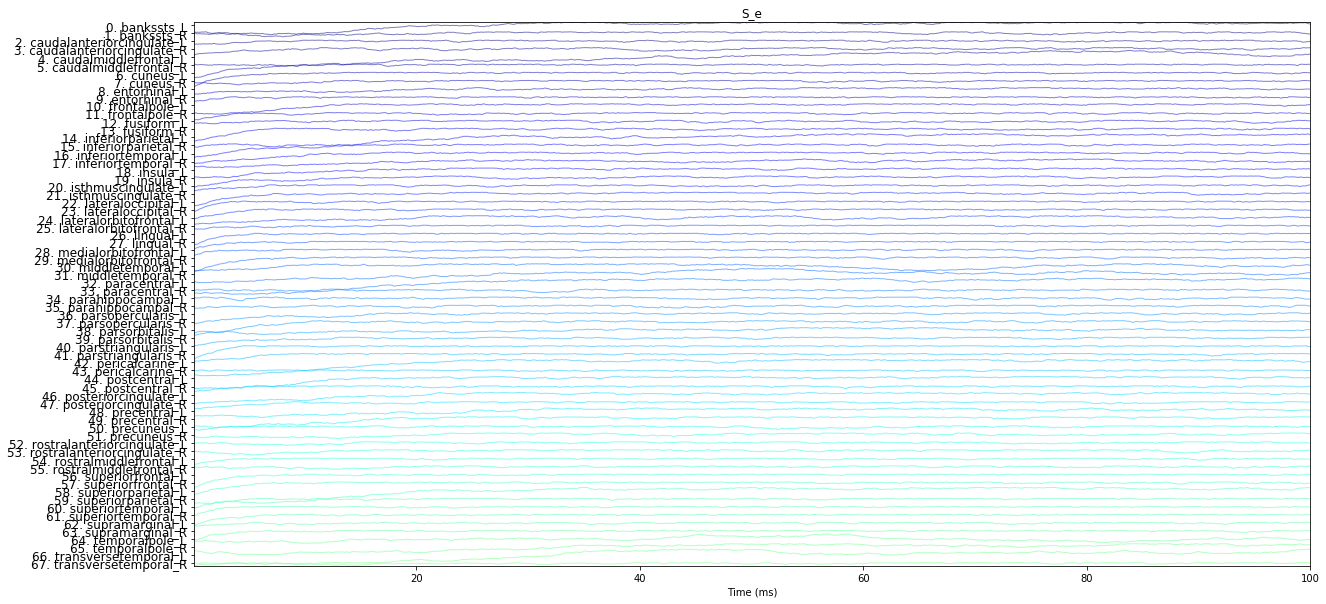

2020-04-01 18:43:43,509 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:43,828 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:44,017 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:44,312 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:44,546 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:44,703 - DEBUG - matplotlib.axes._base - update_title_pos


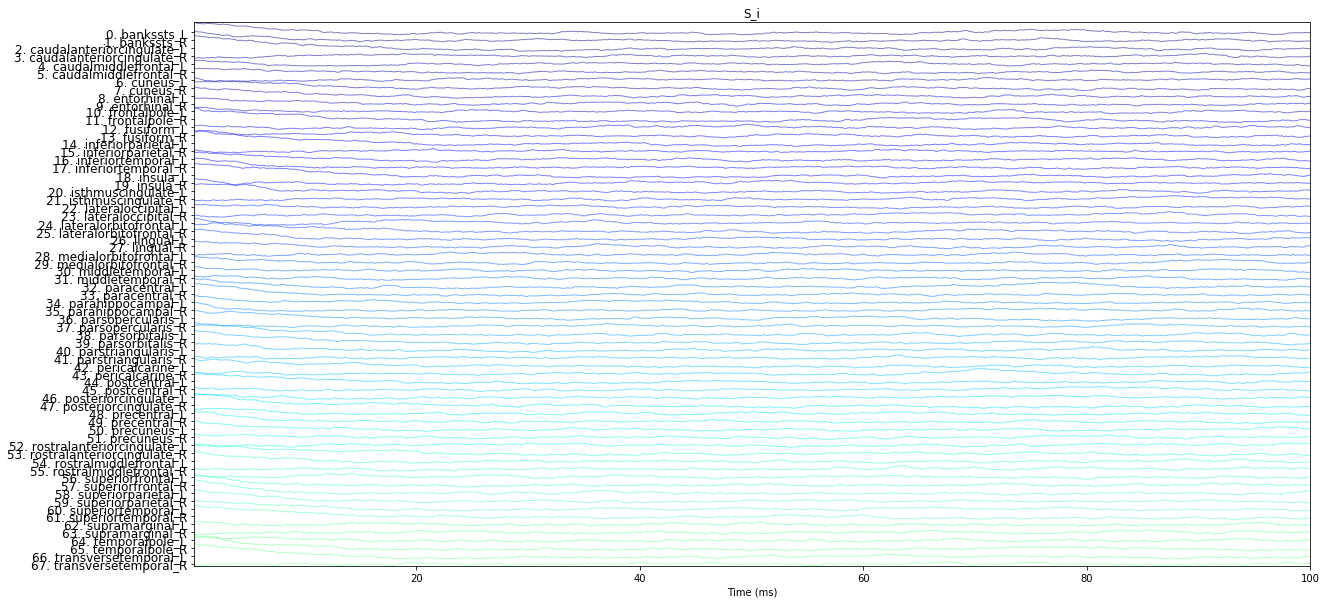

2020-04-01 18:43:45,195 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:45,501 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:45,681 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:45,941 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:46,177 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:46,333 - DEBUG - matplotlib.axes._base - update_title_pos


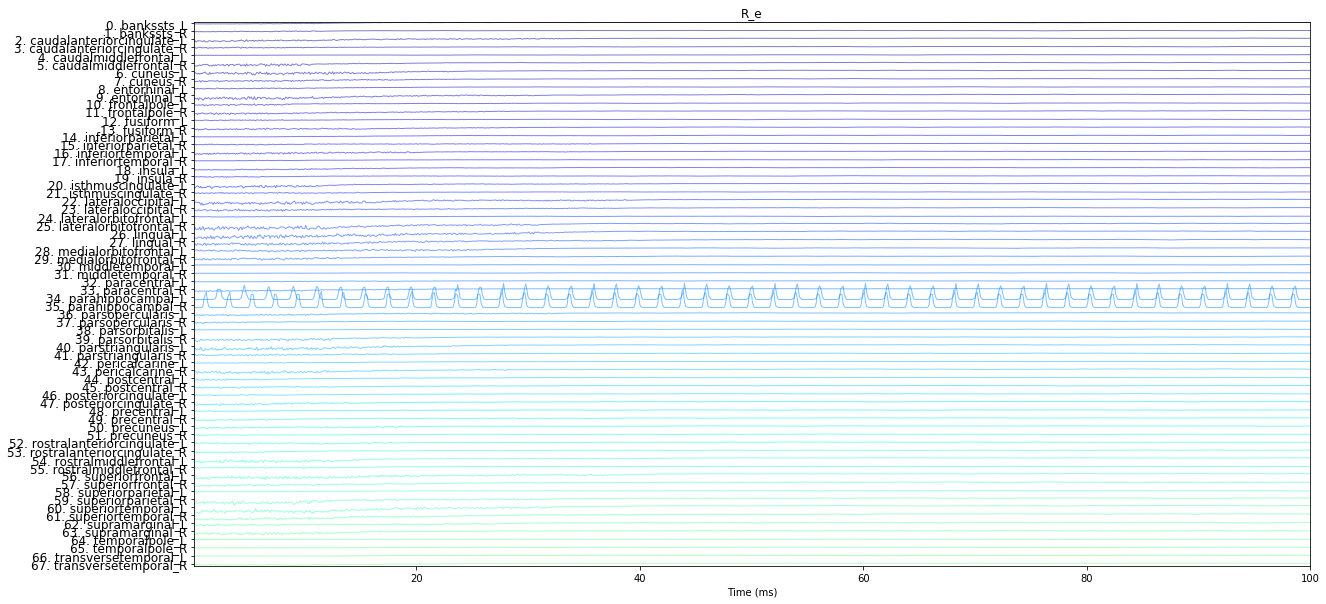

2020-04-01 18:43:46,706 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:47,077 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:47,268 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:47,567 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:47,806 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:47,985 - DEBUG - matplotlib.axes._base - update_title_pos


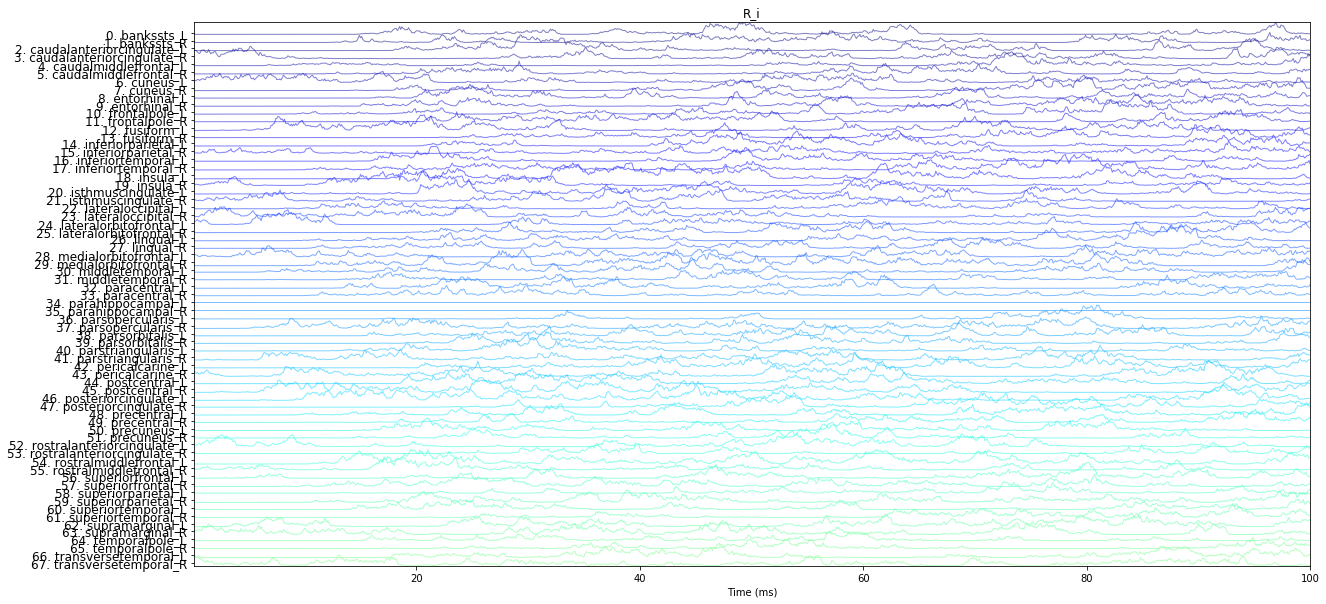

<Figure size 432x288 with 0 Axes>

In [19]:
# For raster plot:
for sv in ["S_e", "S_i", "R_e", "R_i"]:
    plotter.plot_raster(source_ts.get_state_variables(sv), 
                        title="Region %s Time Series Raster" % sv, 
                        figsize=config.figures.NOTEBOOK_SIZE);

2020-04-01 18:43:48,435 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:48,717 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:48,819 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:48,980 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:49,023 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:49,058 - DEBUG - matplotlib.axes._base - update_title_pos


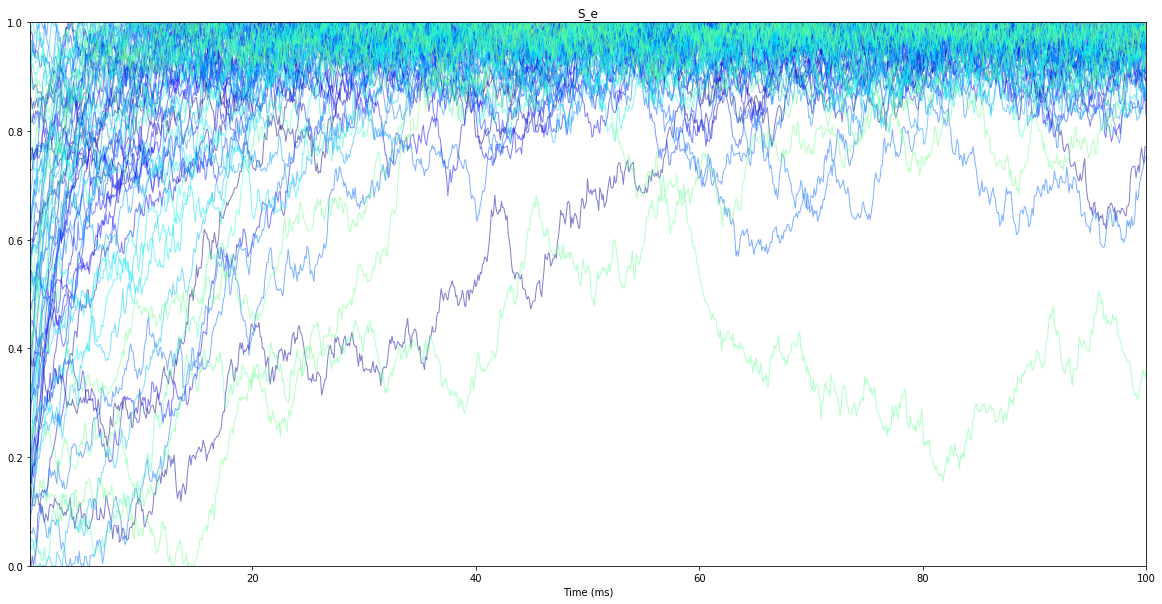

2020-04-01 18:43:49,355 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:49,674 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:49,793 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:50,017 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:50,056 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:50,089 - DEBUG - matplotlib.axes._base - update_title_pos


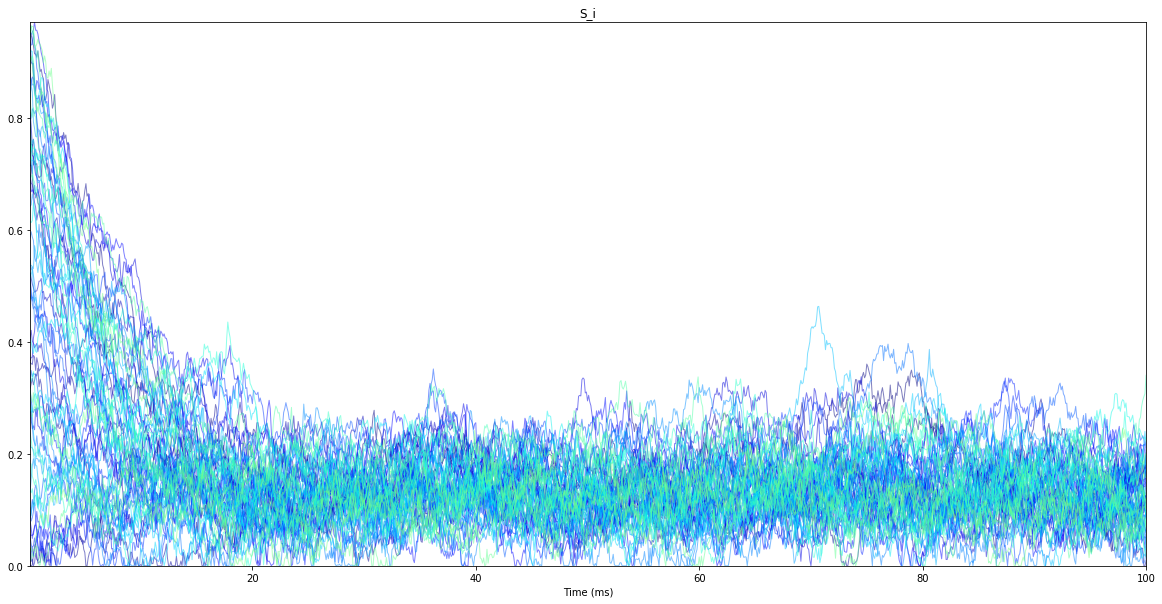

2020-04-01 18:43:50,412 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:50,737 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:50,833 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:51,053 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:51,090 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:51,126 - DEBUG - matplotlib.axes._base - update_title_pos


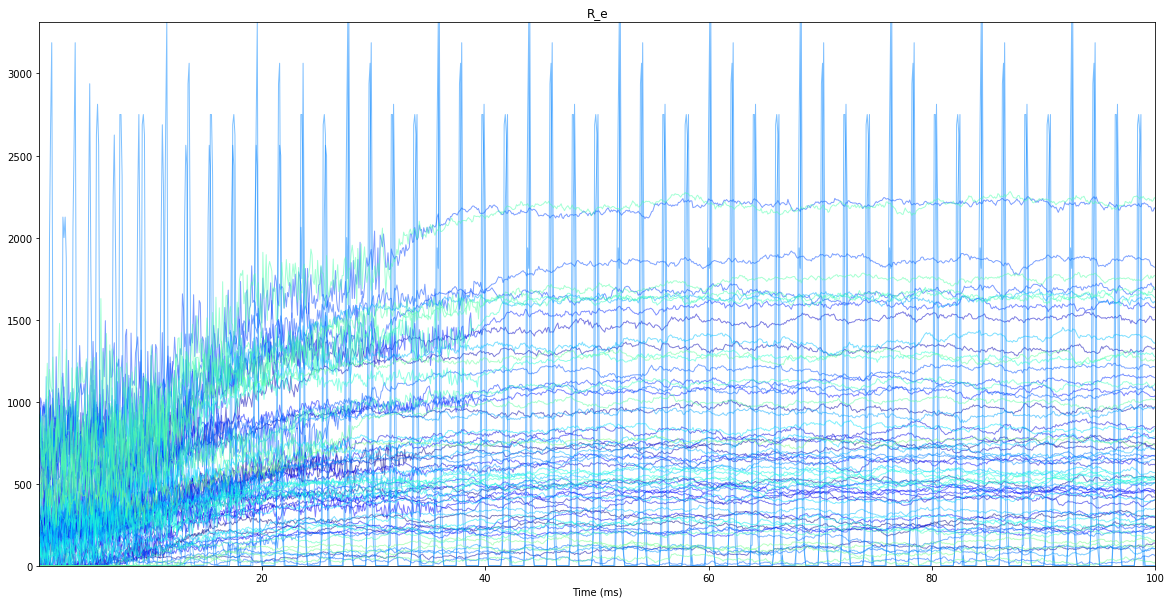

2020-04-01 18:43:51,446 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:51,951 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:52,117 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:52,517 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:52,558 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:52,590 - DEBUG - matplotlib.axes._base - update_title_pos


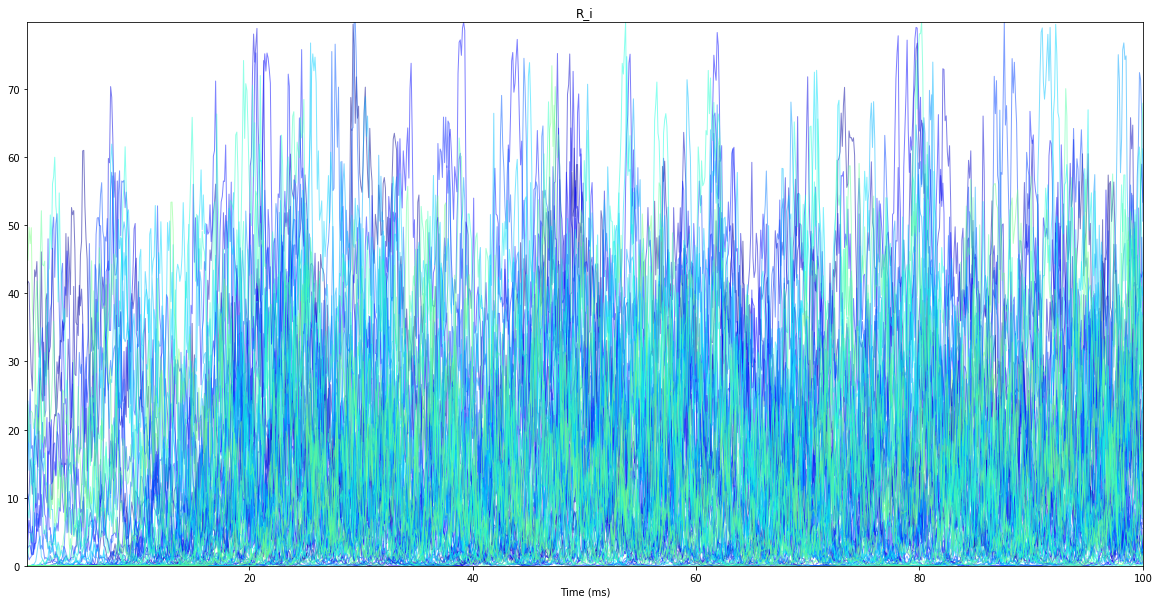

<Figure size 432x288 with 0 Axes>

In [20]:
# For timeseries plot:
for sv in ["S_e", "S_i", "R_e", "R_i"]:
    plotter.plot_timeseries(source_ts.get_state_variables(sv), 
                        title="Region %s Time Series " % sv, 
                        figsize=config.figures.NOTEBOOK_SIZE);

2020-04-01 18:43:53,060 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,199 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,224 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,343 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,373 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,389 - DEBUG - matplotlib.axes._base - update_title_pos


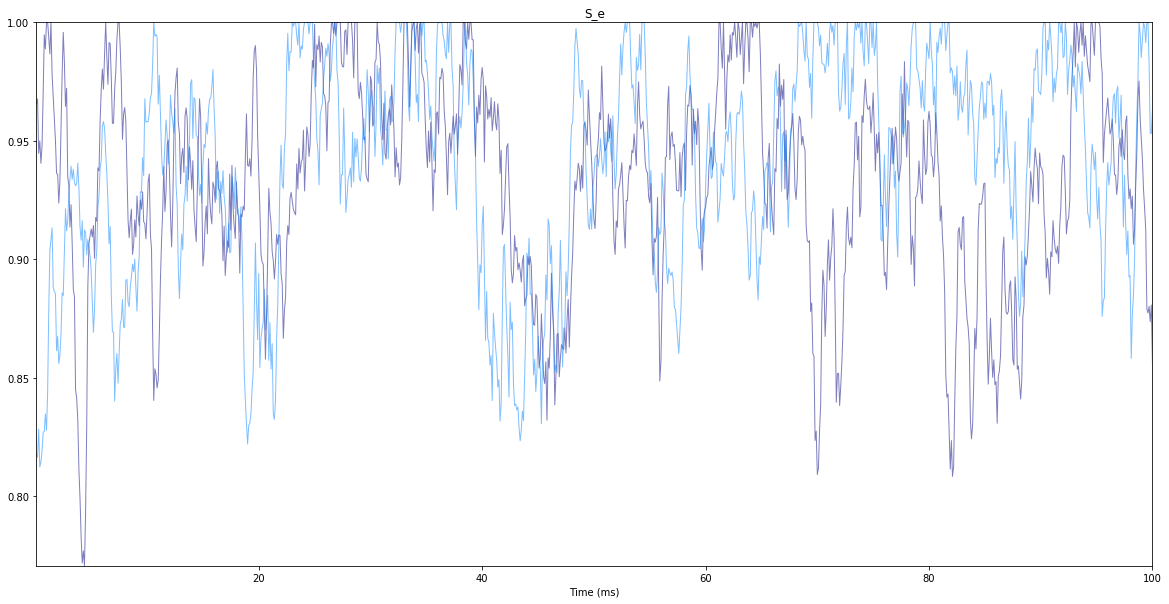

2020-04-01 18:43:53,566 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,701 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:53,728 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,801 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,826 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:53,847 - DEBUG - matplotlib.axes._base - update_title_pos


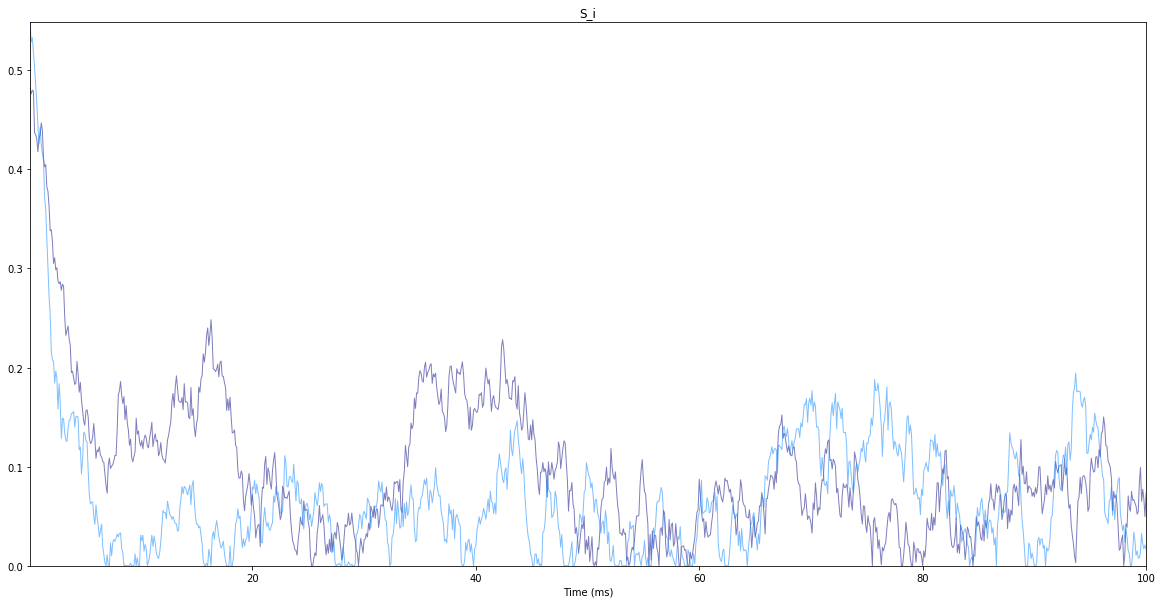

2020-04-01 18:43:53,955 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,115 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:54,148 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,270 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,299 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,318 - DEBUG - matplotlib.axes._base - update_title_pos


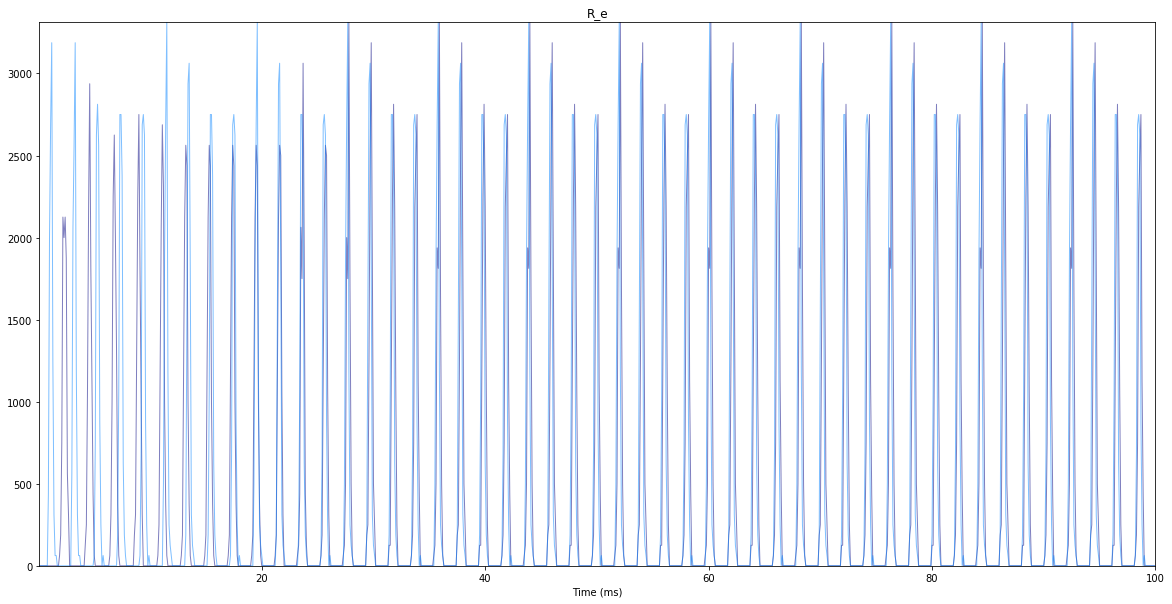

2020-04-01 18:43:54,482 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,570 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:54,595 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,668 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,700 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,721 - DEBUG - matplotlib.axes._base - update_title_pos


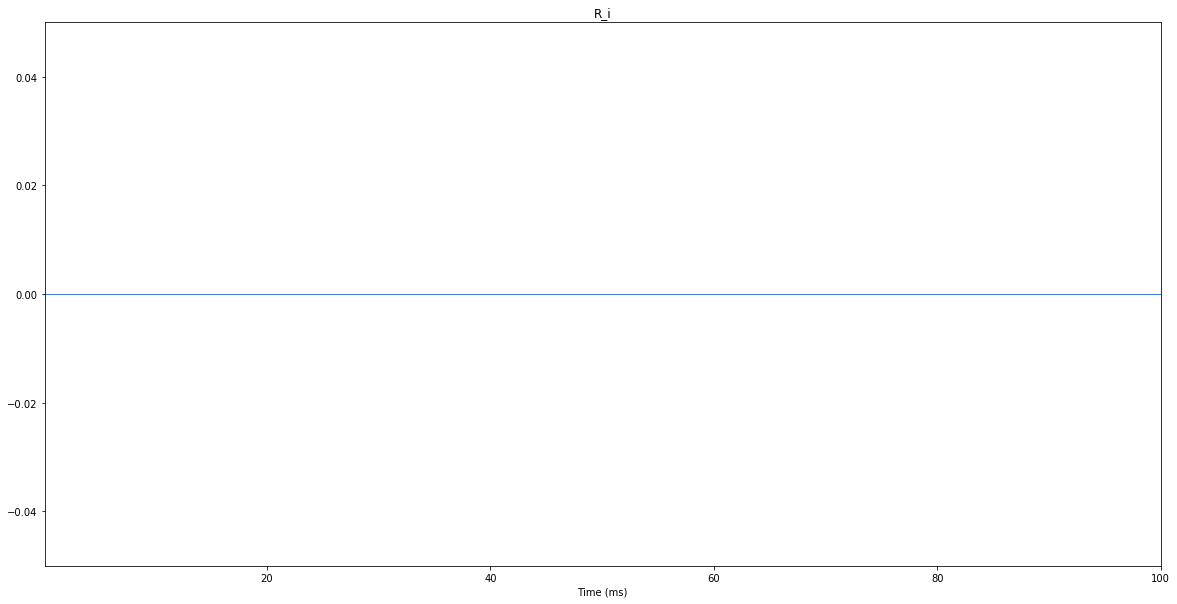

<Figure size 432x288 with 0 Axes>

In [21]:
# For timeseries plot of the spiking regions modeled in NEST:
for sv in ["S_e", "S_i", "R_e", "R_i"]:
    ts = source_ts.get_state_variables(sv).get_subspace(tvb_nest_model.spiking_nodes_ids)
    plotter.plot_timeseries(ts, 
                        title="Spiking Region %s Time Series" % sv, 
                        figsize=config.figures.NOTEBOOK_SIZE);

2020-04-01 18:43:54,837 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,954 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:54,981 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,069 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,088 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,103 - DEBUG - matplotlib.axes._base - update_title_pos


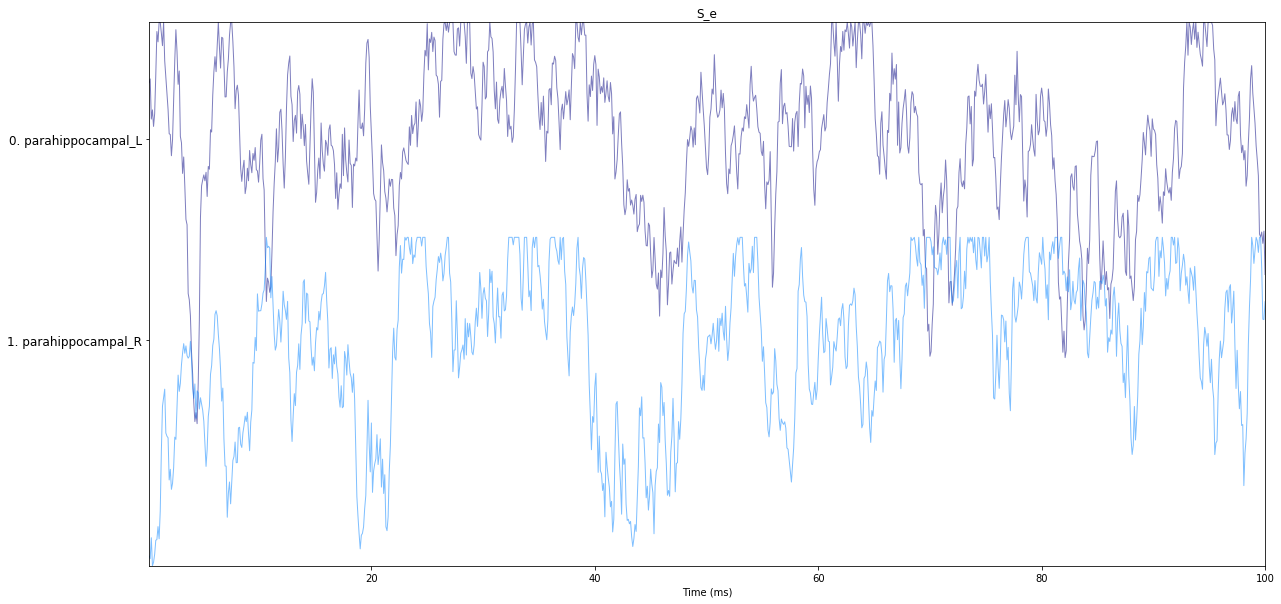

2020-04-01 18:43:55,223 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,327 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:55,353 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,429 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,451 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,464 - DEBUG - matplotlib.axes._base - update_title_pos


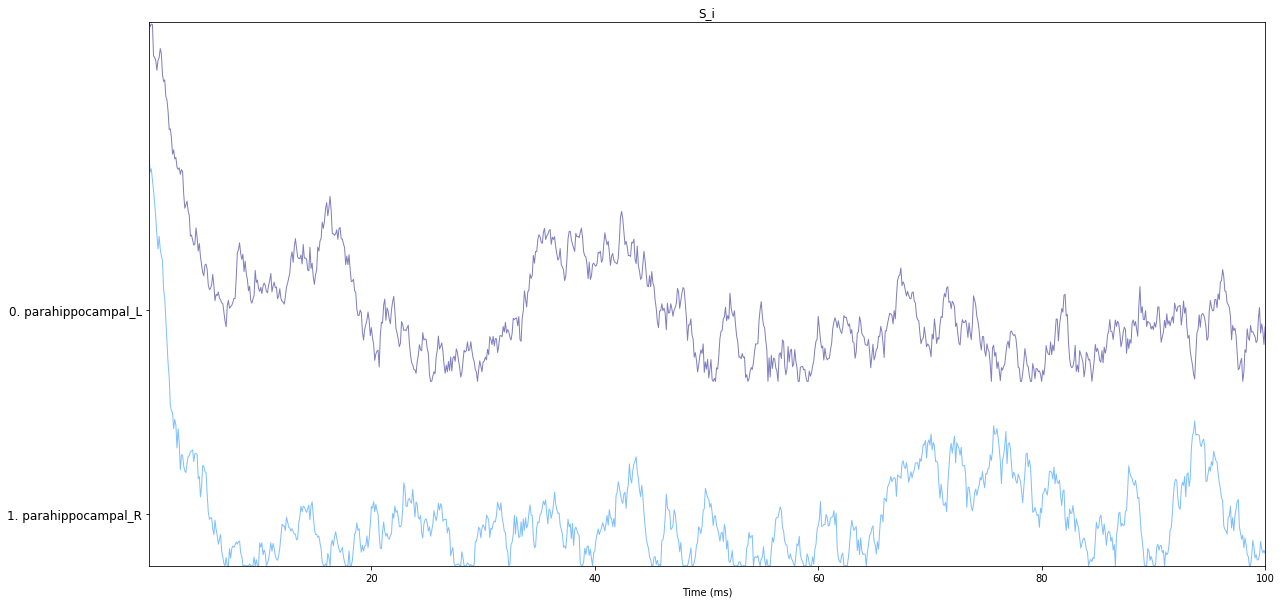

2020-04-01 18:43:55,663 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,788 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:55,814 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,913 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,941 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:55,957 - DEBUG - matplotlib.axes._base - update_title_pos


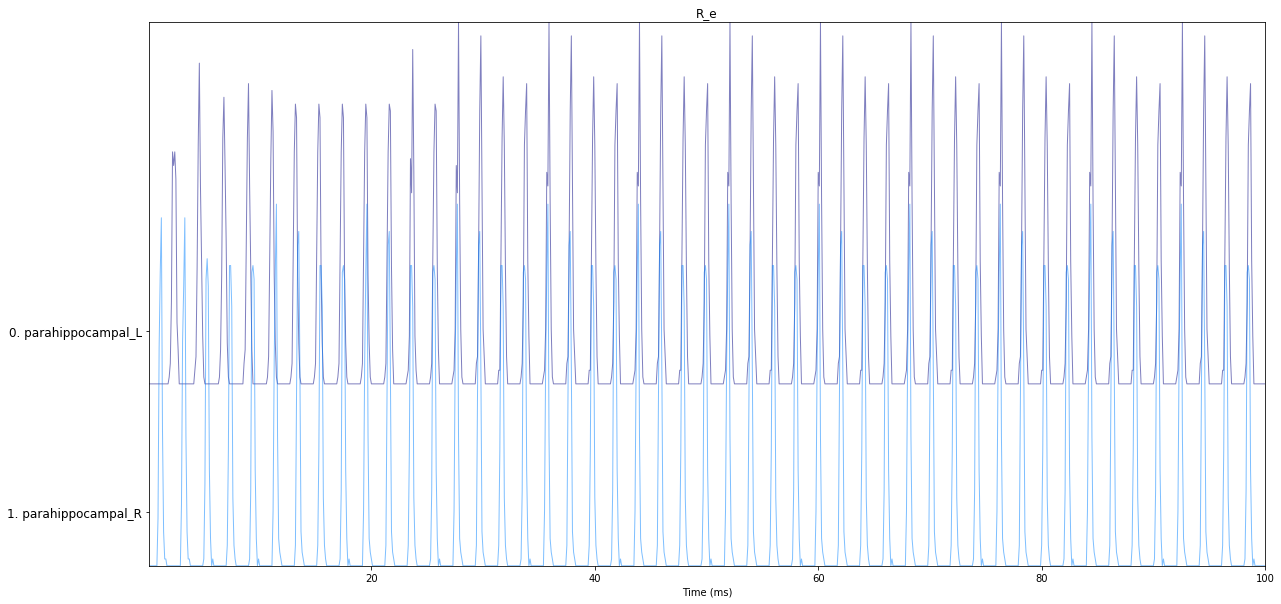

2020-04-01 18:43:56,109 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:56,199 - DEBUG - matplotlib.axes._base - update_title_pos


/home/docker/packages/tvb-scripts/tvb_scripts/plot/time_series_plotter.py:254: RuntimeWarning:invalid value encountered in true_divide


<Figure size 432x288 with 0 Axes>

2020-04-01 18:43:56,220 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:56,287 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:56,309 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:43:56,324 - DEBUG - matplotlib.axes._base - update_title_pos


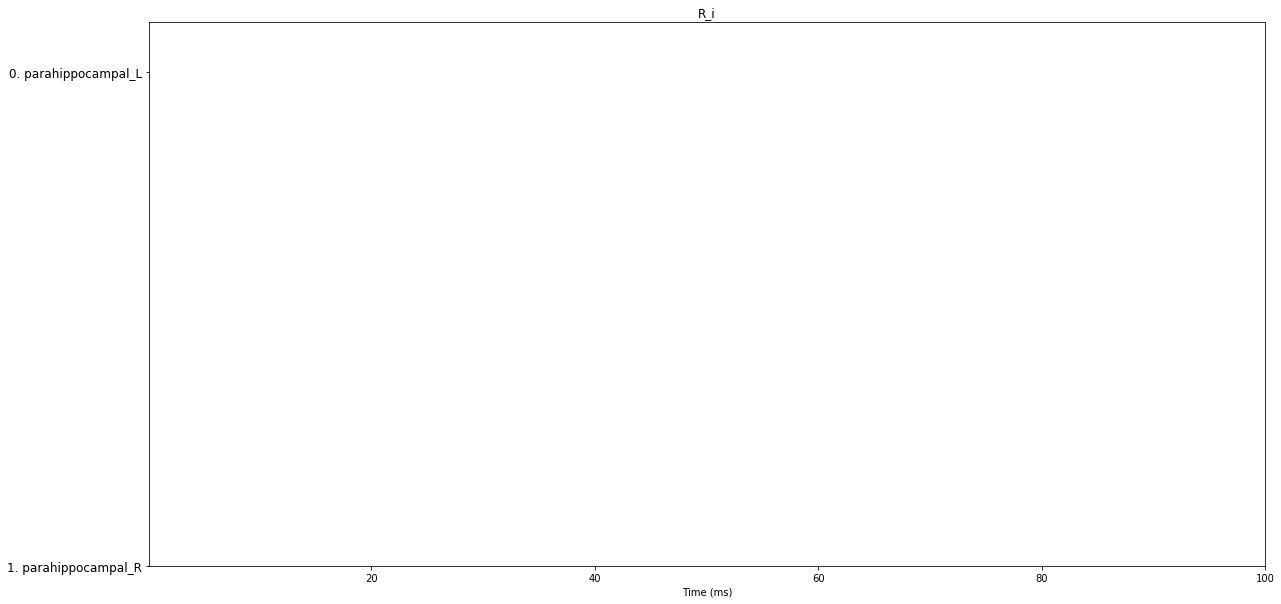

<Figure size 432x288 with 0 Axes>

In [22]:
# For raster plot of the spiking regions modeled in NEST:
for sv in ["S_e", "S_i", "R_e", "R_i"]:
    ts = source_ts.get_state_variables(sv).get_subspace(tvb_nest_model.spiking_nodes_ids)
    plotter.plot_raster(ts, 
                        title="Spiking Region %s Time Series Raster" % sv, 
                        figsize=config.figures.NOTEBOOK_SIZE);

### Interactive time series plot

In [23]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# plotter.plot_timeseries_interactive(source_ts)

### Plot population mean membrane potential time series

In [24]:
%matplotlib inline 
# Get continuous state variables from NEST via interfaces to NEST multimeter devices
multimeter_mean_data = tvb_nest_model.get_mean_data_from_multimeter_to_TVBTimeSeries()
# print(multimeter_mean_data)
# print(multimeter_mean_data.variables_labels)

2020-04-01 18:43:56,406 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [25]:
# Substitute the per-region synaptic variables with their sums to reduce outputs:

s_AMPA_ext = multimeter_mean_data.get_state_variables_by_label(
            ['s_AMPA_ext_%d' % node_id for node_id in range(tvb_nest_model.number_of_nodes)], 
            title="Mean population s_AMPA_ext from NEST multimeter")
I_AMPA_ext = multimeter_mean_data.get_state_variables_by_label(
            ['I_AMPA_ext_%d' % node_id for node_id in range(tvb_nest_model.number_of_nodes)], 
            title="Mean population I_AMPA_ext from NEST multimeter")
spikes_exc_ext = multimeter_mean_data.get_state_variables_by_label(
                ['spikes_exc_ext_%d' % node_id for node_id in range(tvb_nest_model.number_of_nodes)], 
                title="Mean population spikes_exc_ext from NEST multimeter")
s_AMPA_ext_nest_nodes = s_AMPA_ext.get_state_variables_by_label(
                        ['s_AMPA_ext_%d' % node_id for node_id in tvb_nest_model.spiking_nodes_ids], 
                        title="Mean population s_AMPA_ext_nest_nodes from NEST multimeter")
I_AMPA_ext_nest_nodes = I_AMPA_ext.get_state_variables_by_label(
                        ['I_AMPA_ext_%d' % node_id for node_id in tvb_nest_model.spiking_nodes_ids], 
                        title="Mean population I_AMPA_ext_nest_nodes from NEST multimeter")
spikes_exc_ext_nest_nodes = spikes_exc_ext.get_state_variables_by_label(
                            ['spikes_exc_ext_%d' % node_id for node_id in tvb_nest_model.spiking_nodes_ids], 
                            title="Mean population spikes_exc_ext_nest_nodes from NEST multimeter")

from tvb_scripts.time_series.service import TimeSeriesService
ts_service = TimeSeriesService()
s_AMPA_ext_tot = ts_service.sum_across_dimension(s_AMPA_ext, 1, 
                                                 title="Mean population s_AMPA_ext_tot from NEST multimeter")
s_AMPA_ext_tot.labels_dimensions["Variable"] = ["s_AMPA_ext_tot"]
I_AMPA_ext_tot = ts_service.sum_across_dimension(I_AMPA_ext, 1, 
                                                 title="Mean population I_AMPA_ext_tot from NEST multimeter")
I_AMPA_ext_tot.labels_dimensions["Variable"] = ["I_AMPA_ext_tot"]
spikes_exc_ext_tot = ts_service.sum_across_dimension(spikes_exc_ext, 1, 
                                                     title="Mean population spikes_exc_ext_tot from NEST multimeter")
spikes_exc_ext_tot.labels_dimensions["Variable"] = ["spikes_exc_ext_tot"]

multimeter_mean_data_ext = \
    ts_service.concatenate_variables([spikes_exc_ext_tot, s_AMPA_ext_tot, I_AMPA_ext_tot, 
                                      spikes_exc_ext_nest_nodes, s_AMPA_ext_nest_nodes, I_AMPA_ext_nest_nodes])

multimeter_mean_data_exc = multimeter_mean_data.get_state_variables_by_label(
            ['spikes_exc', 's_AMPA', 'I_AMPA', 'x_NMDA', 's_NMDA', 'I_NMDA'], 
            title="Mean exciatory synapse data from NEST multimeter")
    
multimeter_mean_data_inh = multimeter_mean_data.get_state_variables_by_label(
            ['spikes_inh', 's_GABA', 'I_GABA'], 
           title="Mean inhibitory synapse data from NEST multimeter")
    
multimeter_mean_data_neuron = multimeter_mean_data.get_state_variables_by_label(
            ['V_m', 'I_L', 'I_e'], 
            title="Mean external synapse data from NEST multimeter")

In [26]:
# for data, label in zip([multimeter_mean_data_neuron, multimeter_mean_data_exc,
#                         multimeter_mean_data_inh, multimeter_mean_data_ext], 
#                        ["", " Excitatory synapses ", " Inhibitory synapses ", " External synapses "]):
#     plotter.plot_multimeter_raster(data, plot_per_variable=True,
#                                    time_series_class=TimeSeriesRegion, 
#                                    time_series_args={}, var_pop_join_str=" - ", 
#                                    default_population_label="population",
#                                    title="NEST region %stime series raster" % label)

In [27]:
# for data, label in zip([multimeter_mean_data_neuron, multimeter_mean_data_exc,
#                         multimeter_mean_data_inh, multimeter_mean_data_ext], 
#                        ["", " Excitatory synapses ", " Inhibitory synapses ", " External synapses "]):    
#     plotter.plot_multimeter_timeseries(data, plot_per_variable=True,
#                                        time_series_class=TimeSeriesRegion, 
#                                        time_series_args={}, var_pop_join_str=" - ", 
#                                        default_population_label="population",
#                                        title="NEST region %stime series" % label)

### Plot spikes' raster and mean spike rate for NEST regions

2020-04-01 18:44:01,055 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,085 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,110 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,120 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,247 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,272 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,292 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,301 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,320 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,350 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,373 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,382 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,494 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:01,518 -

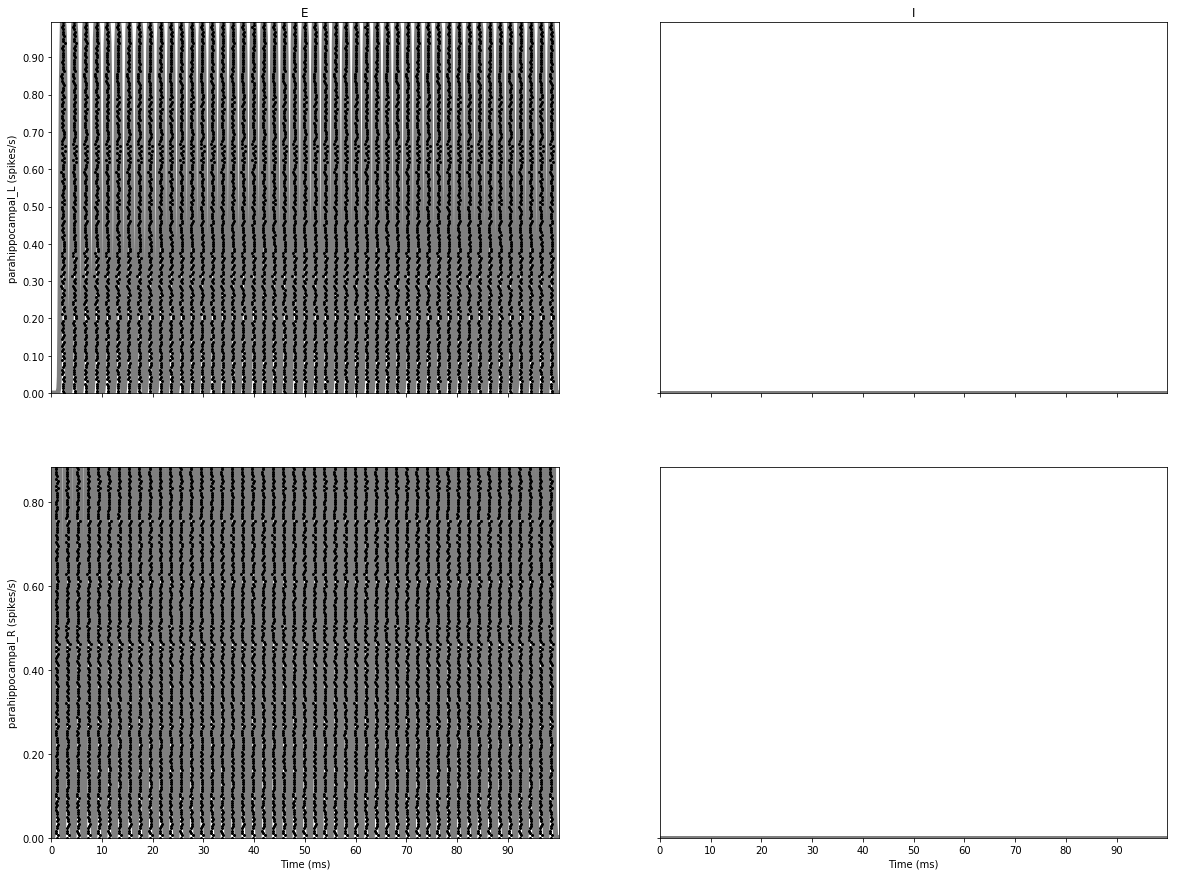

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot spikes and mean field spike rates
# Get spikes' timeseries and compute population rates, via interfaces to NEST spike detector devices
rates, spike_detectors = \
    tvb_nest_model.get_mean_spikes_rates_to_TVBTimeSeries(
        spikes_kernel_width= 1.0,  # ms
        spikes_kernel_overlap=0.0, time=t)
if spike_detectors is not None:
    plotter.plot_spike_detectors(spike_detectors, rates=rates, title='Population spikes and mean spike rate')

In [29]:
spike_detectors["I"][0].times

array([], dtype=float64)

### Plotting NEST network activity using xarray

In [30]:
from tvb_scripts.datatypes.time_series_xarray import TimeSeries as TimeSeriesXarray
import xarray as xr

# Get population mean field data via a direct interface to NEST multimeter devices...
multimeter_mean_data = nest_network.get_mean_data_from_multimeter()

# ...and put them into a TimeSeriesXarray object
ts = TimeSeriesXarray(multimeter_mean_data)
print(ts)

# We place here all variables that relate to local excitatory synapses
ts_exc = ts[:, ["spikes_exc", "s_AMPA", "I_AMPA", "x_NMDA", "s_NMDA", "I_NMDA"]]
ts_exc._data.name = "Mean excitatory synapse data from NEST multimeter"
print(ts_exc)

# We place here all variables that relate to local inhibitory synapses
ts_inh = ts[:, ["spikes_inh", "s_GABA", "I_GABA"]]
ts_inh._data.name = "Mean inhibitory synapse data from NEST multimeter"
print(ts_inh)

# Substitute the per-region synaptic variables with their sums to reduce outputs:
s_AMPA_ext_nest_nodes = ts[:, ['s_AMPA_ext_%d' % node_id for node_id in nest_nodes_ids] ]._data
I_AMPA_ext_nest_nodes = ts[:, ['I_AMPA_ext_%d' % node_id for node_id in nest_nodes_ids] ]._data
spikes_exc_ext_nest_nodes = ts[:, ['spikes_exc_ext_%d' % node_id for node_id in nest_nodes_ids] ]._data

s_AMPA_ext_tot = \
    ts[:, ['s_AMPA_ext_%d' % node_id for node_id in range(tvb_nest_model.number_of_nodes)] ].\
    _data.sum(axis=1).expand_dims(axis=1, dim={"Variable": ["s_AMPA_ext_tot"]})
I_AMPA_ext_tot = \
    ts[:, ['I_AMPA_ext_%d' % node_id for node_id in range(tvb_nest_model.number_of_nodes)] ].\
    _data.sum(axis=1).expand_dims(axis=1, dim={"Variable": ["I_AMPA_ext_tot"]})
spikes_exc_ext_tot = \
    ts[:, ['spikes_exc_ext_%d' % node_id for node_id in range(tvb_nest_model.number_of_nodes)] ].\
    _data.sum(axis=1).expand_dims(axis=1, dim={"Variable": ["spikes_exc_ext_tot"]})


# We place here all variables that relate to large-scale excitatory synapses
ts_ext = TimeSeriesXarray( 
            xr.concat([spikes_exc_ext_tot, s_AMPA_ext_tot, I_AMPA_ext_tot, 
                       spikes_exc_ext_nest_nodes, s_AMPA_ext_nest_nodes, I_AMPA_ext_nest_nodes], "Variable"))
ts_ext._data.name = "Mean external synapse data from NEST multimeter"
print(ts_ext)

# We place here all variables that refer to all neurons of all populations the same
ts_neuron = ts[:, ["I_e", "V_m", "I_L"]]

TimeSeries (
  Dimensions ....... ['Time', 'Variable', 'Region', 'Population']
  Length ........... 100
  Sample period .... 1.0
  Time units ....... 
  Time-series name . Mean data from Spiking Network multimeter
  Time-series type . TimeSeries
  [min, median, max]  [-1.4836e+07, 0, 404.043]
  dtype ............ float64
  shape ............ (100, 216, 2, 2)
)
TimeSeries (
  Dimensions ....... ['Time', 'Variable', 'Region', 'Population']
  Length ........... 100
  Sample period .... 1.0
  Time units ....... 
  Time-series name . Mean data from Spiking Network multimeter
  Time-series type . TimeSeries
  [min, median, max]  [-869.348, 0.999831, 222.545]
  dtype ............ float64
  shape ............ (100, 6, 2, 2)
)
TimeSeries (
  Dimensions ....... ['Time', 'Variable', 'Region', 'Population']
  Length ........... 100
  Sample period .... 1.0
  Time units ....... 
  Time-series name . Mean data from Spiking Network multimeter
  Time-series type . TimeSeries
  [min, median, max]  [0, 

2020-04-01 18:44:06,623 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,656 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,680 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,697 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,725 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,745 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,787 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,804 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,855 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,878 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,923 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,943 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:06,985 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,005 -

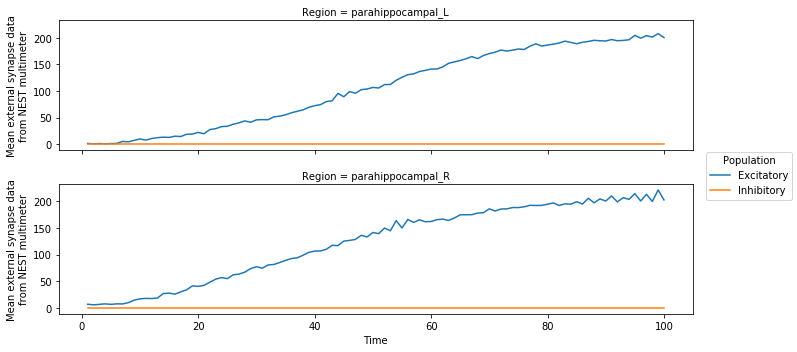

2020-04-01 18:44:07,269 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,308 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,337 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,363 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,405 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,432 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,477 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,500 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,561 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,579 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,621 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,636 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,679 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:07,698 -

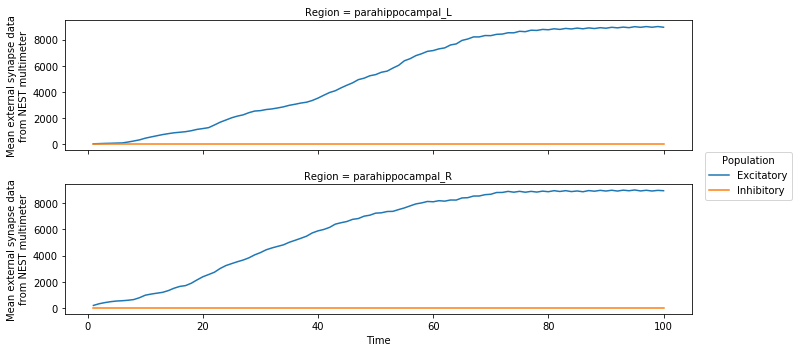

2020-04-01 18:44:07,979 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,020 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,053 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,072 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,102 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,123 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,166 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,184 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,242 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,260 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,301 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,321 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,365 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,390 -

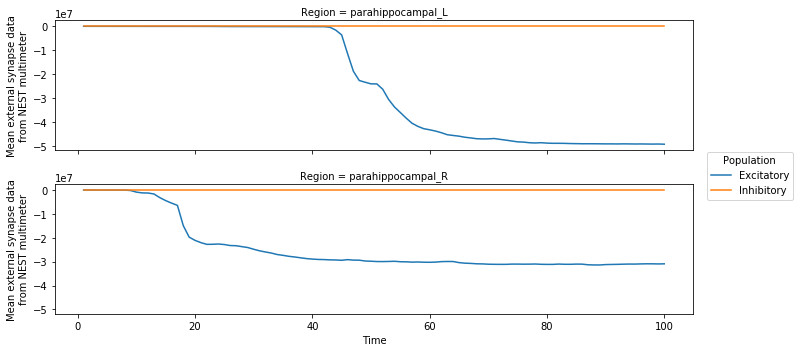

2020-04-01 18:44:08,645 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,687 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,714 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,733 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,760 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,784 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,839 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,859 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,911 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,930 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,969 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:08,986 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,028 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,050 -

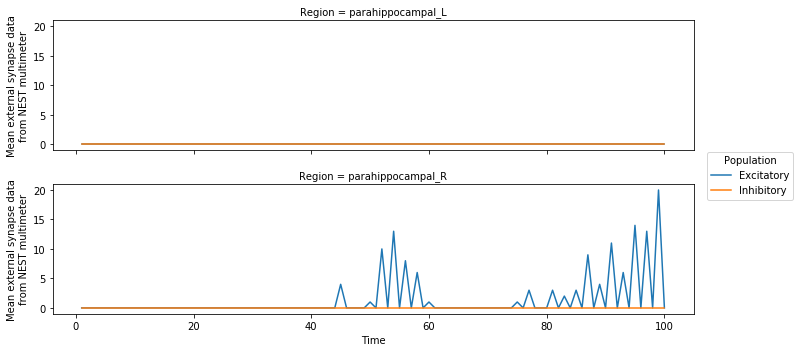

2020-04-01 18:44:09,299 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,335 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,361 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,378 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,405 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,424 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,470 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,485 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,537 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,555 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,597 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,613 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,658 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,683 -

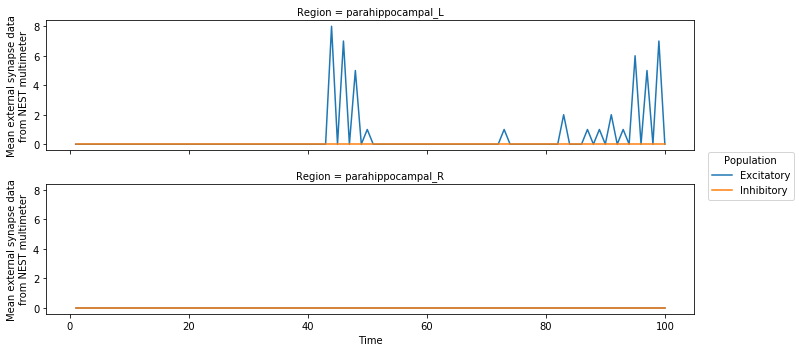

2020-04-01 18:44:09,938 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,972 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:09,995 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,017 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,047 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,069 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,115 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,132 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,184 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,201 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,242 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,260 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,303 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,327 -

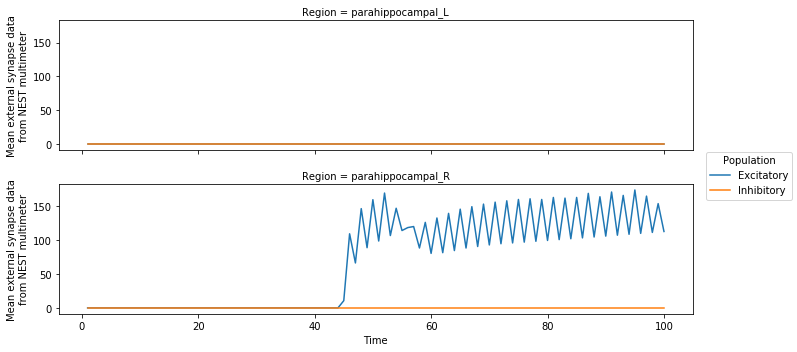

2020-04-01 18:44:10,574 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,614 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,644 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,665 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,691 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,711 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,758 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,781 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,843 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,863 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,907 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,924 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,977 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:10,998 -

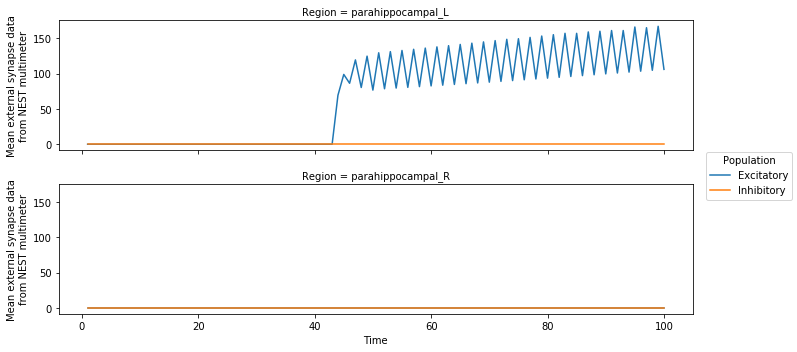

2020-04-01 18:44:11,269 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,301 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,323 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,341 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,373 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,398 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,443 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,460 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,513 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,531 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,575 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,589 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,633 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,655 -

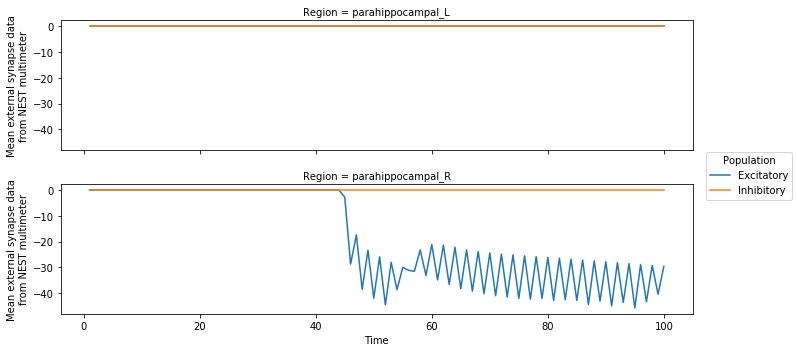

2020-04-01 18:44:11,928 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,964 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:11,987 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,008 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,037 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,067 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,127 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,143 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,196 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,212 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,254 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,268 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,311 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,335 -

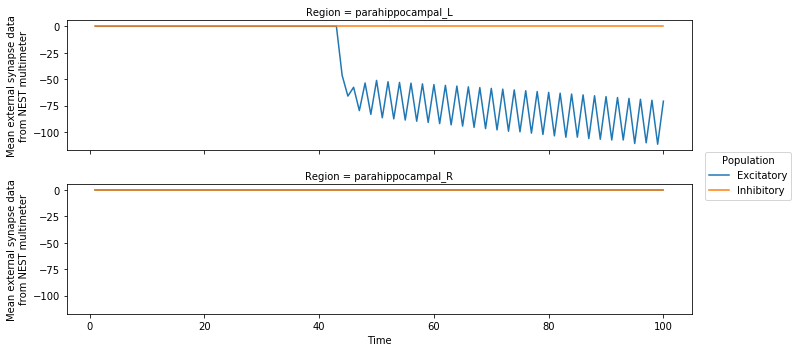

2020-04-01 18:44:12,658 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,688 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,708 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,725 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,753 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,771 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,815 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,833 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,896 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,917 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,969 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:12,985 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,032 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,053 -

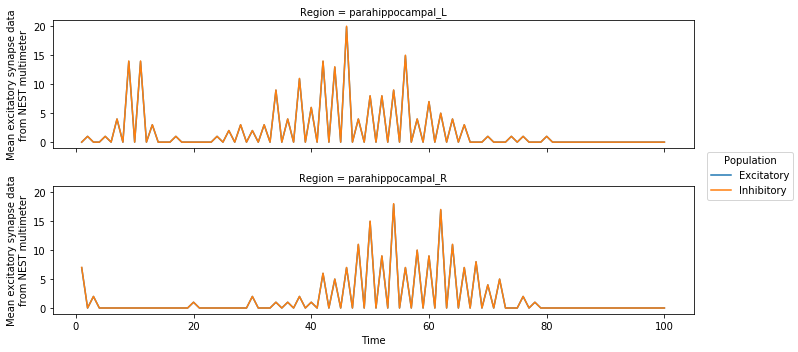

2020-04-01 18:44:13,320 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,356 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,378 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,396 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,426 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,451 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,491 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,508 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,575 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,594 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,637 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,656 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,703 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,721 -

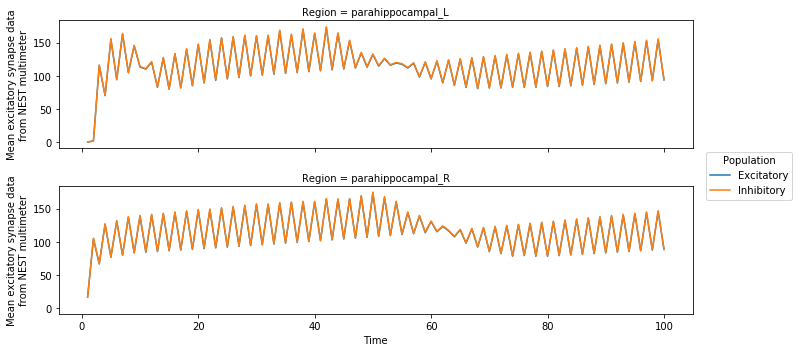

2020-04-01 18:44:13,964 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:13,998 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,022 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,038 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,063 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,087 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,167 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,188 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,261 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,279 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,320 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,336 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,388 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,410 -

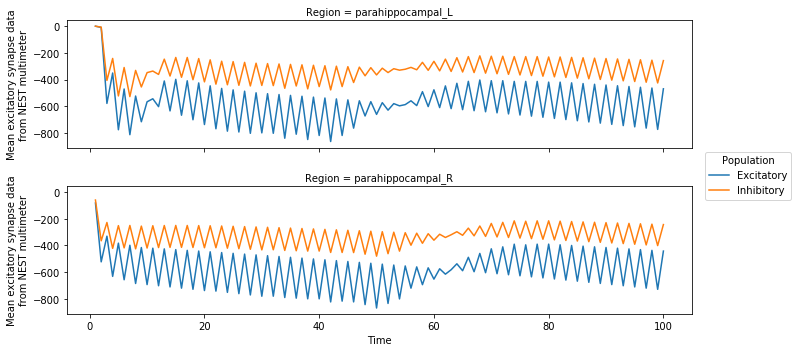

2020-04-01 18:44:14,669 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,706 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,729 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,745 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,777 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,797 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,841 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,857 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,933 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,954 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:14,997 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,015 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,064 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,081 -

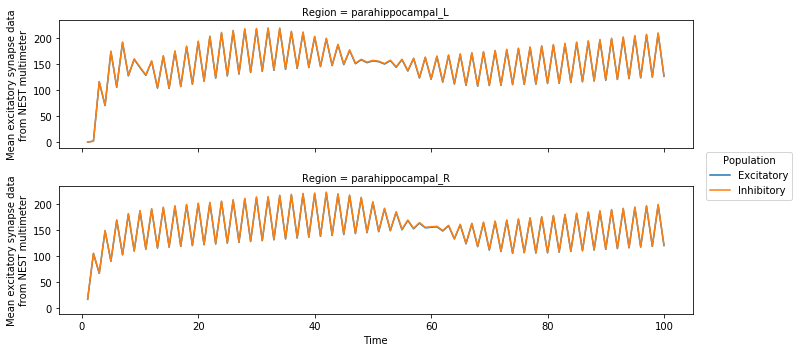

2020-04-01 18:44:15,332 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,368 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,393 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,415 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,440 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,459 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,514 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,529 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,578 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,597 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,636 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,654 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,698 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:15,719 -

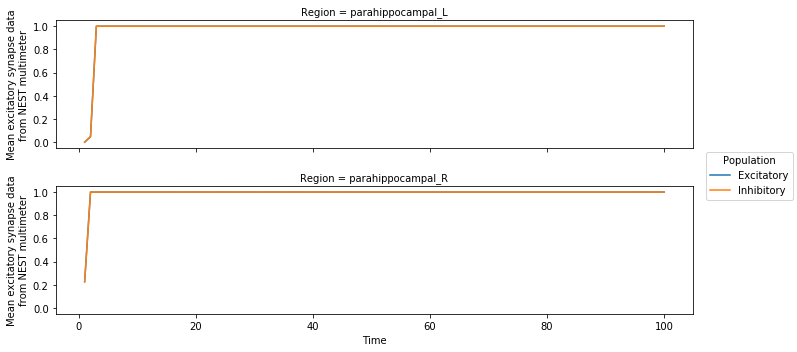

2020-04-01 18:44:15,975 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,018 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,040 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,061 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,089 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,107 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,152 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,167 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,225 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,242 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,281 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,299 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,342 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,365 -

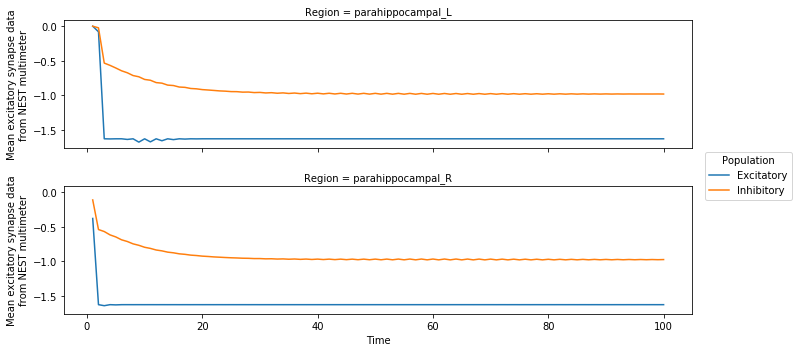

2020-04-01 18:44:16,619 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,662 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,688 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,708 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,733 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,753 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,795 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,813 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,866 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,884 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,930 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,946 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:16,987 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,007 -

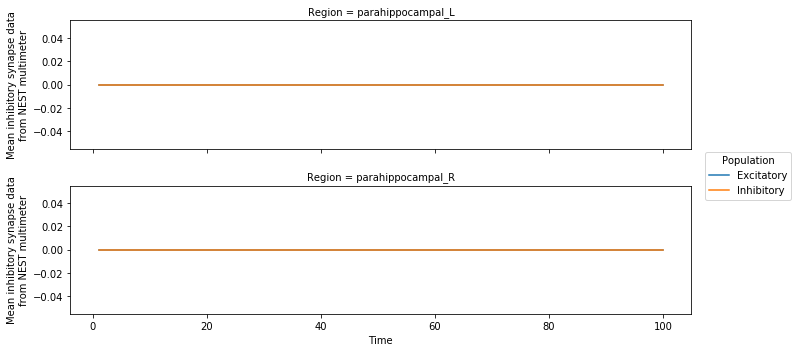

2020-04-01 18:44:17,238 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,269 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,292 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,308 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,334 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,352 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,396 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,415 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,465 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,481 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,527 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,543 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,590 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,621 -

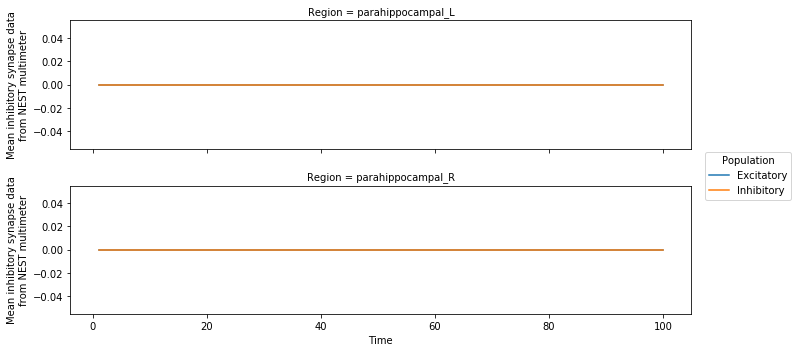

2020-04-01 18:44:17,863 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,897 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,918 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,934 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,969 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:17,990 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,038 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,055 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,104 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,120 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,168 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,184 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,228 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,252 -

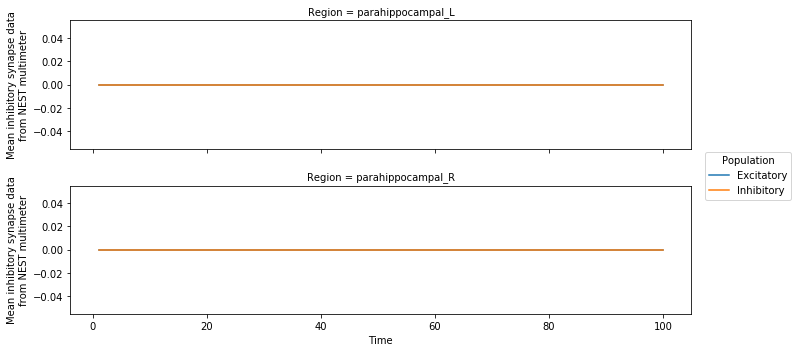

2020-04-01 18:44:18,525 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,565 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,596 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,615 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,641 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,663 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,713 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,733 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,779 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,797 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,804 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,823 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,867 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:18,888 -

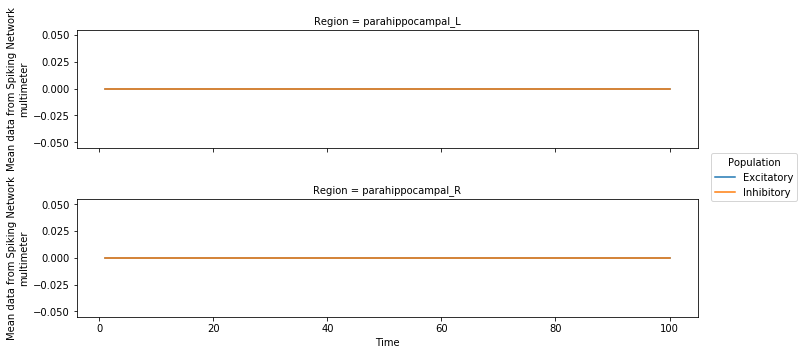

2020-04-01 18:44:19,151 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,193 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,219 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,238 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,261 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,281 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,322 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,342 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,395 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,413 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,452 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,469 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,513 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,536 -

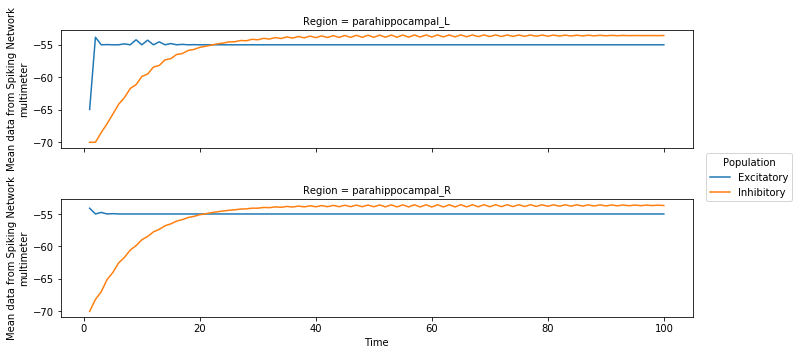

2020-04-01 18:44:19,784 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,821 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,851 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,870 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,896 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,920 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,968 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:19,991 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:20,047 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:20,065 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:20,108 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:20,123 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:20,164 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:20,183 -

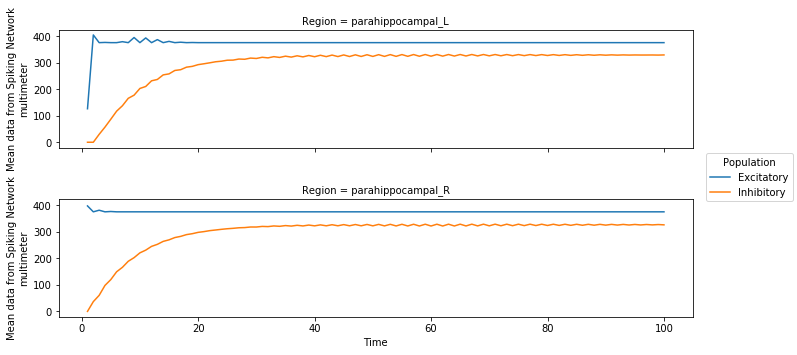

In [31]:
# ts.plot(plotter=plotter, )
# First plot the large-scale synaptic activity that excites the spiking networks...:
ts_ext.plot_timeseries(plotter=plotter, per_variable=True, figsize=(10, 5))
# Then plot the local excitatory...:
ts_exc.plot_timeseries(plotter=plotter, per_variable=True, figsize=(10, 5))
# ...and local inhibtiory synaptic activity that result:
ts_inh.plot_timeseries(plotter=plotter, per_variable=True, figsize=(10, 5))
# ...and finally the common neuronal variables:
ts_neuron.plot_timeseries(plotter=plotter, per_variable=True, figsize=(10, 5))

In [32]:
# ts_ext.plot_raster(plotter=plotter, per_variable=True, linestyle="--", alpha=1.0, linewidth=0.5, figsize=(10, 5))
# ts_exc.plot_raster(plotter=plotter, per_variable=True, linestyle="--", alpha=1.0, linewidth=0.5, figsize=(10, 5))
# ts_inh.plot_raster(plotter=plotter, per_variable=True, linestyle="--", alpha=1.0, linewidth=0.5, figsize=(10, 5))
# ts_neuron.plot_raster(plotter=plotter, per_variable=True, linestyle="--", alpha=1.0, linewidth=0.5, figsize=(10, 5))

### Plotting NEST network spiking activity using xarray

2020-04-01 18:44:47,673 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,697 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,719 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,750 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,786 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f548e267400>
2020-04-01 18:44:47,788 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2020-04-01 18:44:47,789 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f548e267400>
2020-04-01 18:44:47,790 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2020-04-01 18:44:47,808 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,855 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,909 - DEBUG - matplotlib.axes._base - update_title_pos
2020-04-01 18:44:47,981 - DEBUG - matp

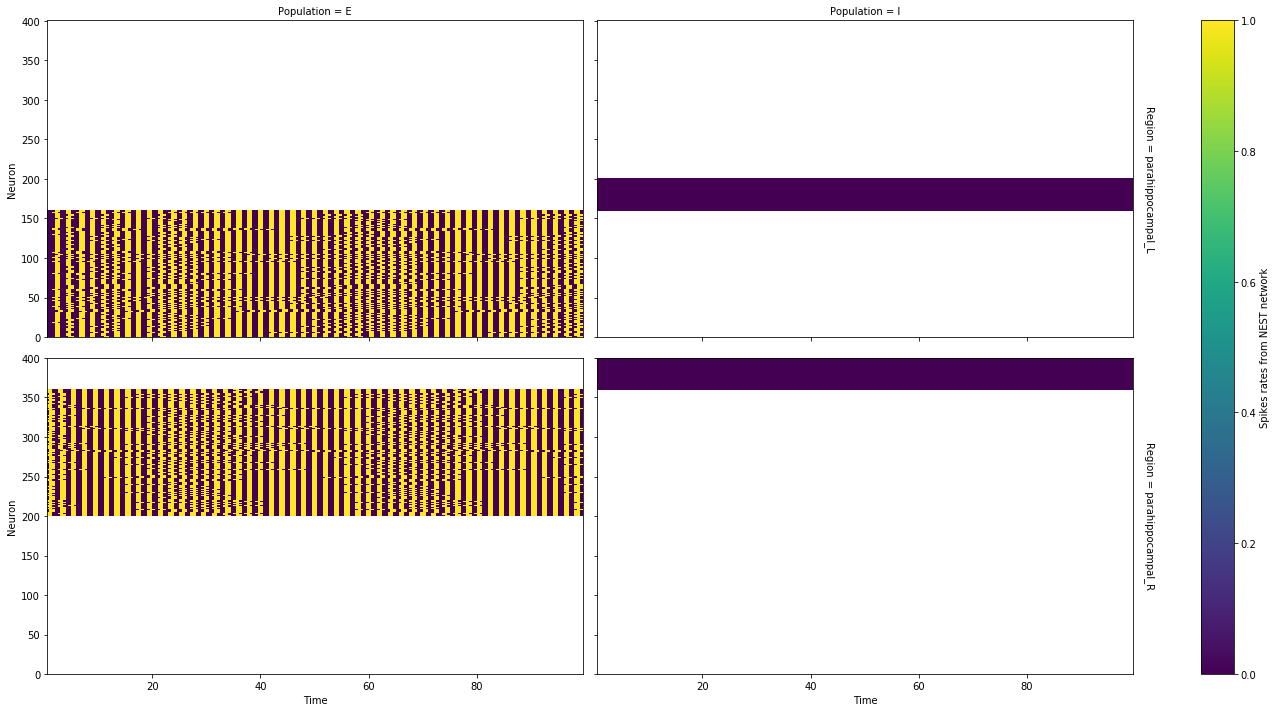

In [34]:
# Use the interface to compute spikes rates per neuron...
rates = nest_network.compute_spikes_rates(
            mode="per_neuron", populations=None, regions=None,
            devices_dim_name="Population", name="Spikes rates from NEST network",
            spikes_kernel_width=1.0, # spikes_kernel_n_intervals=10,
            spikes_kernel_overlap=0.5, min_spike_interval=None,
            spikes_kernel=None)[0]
# ...and plot them: 
rates.plot(x=rates.dims[0], y=rates.dims[3], row=rates.dims[2], col=rates.dims[1], robust=True, figsize=(20, 10))
plotter.base._save_figure(figure_name="Spike rates per neuron")

# Future work

Use co-simulation in memory consolidation networks

# References

1 Paula Sanz Leon, Stuart A. Knock, M. Marmaduke Woodman, Lia Domide, <br>
  Jochen Mersmann, Anthony R. McIntosh, Viktor Jirsa (2013) <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling  <br>
  and multimodal neuroimaging. Brain Connectivity 3:121–145. <br>
   
3 Deco Gustavo, Ponce-Alvarez Adrian, Patric Hagmann, <br>
  Gian Luca Romani, Dante Mantini,and Maurizio Corbetta. <br>
  How local Excitation-Inhibition Ratio Impacts the Whole Brain Dynamics <br>
  The Journal of Neuroscience 34(23), 7886-7898, 2014.<br>

4 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>